# Исследование объявлений о продаже квартир

**Краткое описание проекта**

В рамках данного проекта проводится исследование объявлений о продаже квартир на основании данных из архива объявлений по городу Санкт-Петербург и соседним населенным пунктам.

**Цель проекта**

Основной целью проекта является определение параметров, оказывающих влияние на цену квартир, а также выявление аномалий и мошеннической деятельности для автоматизированного отслеживания данных объявлений.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — общая площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

**План работы**

Для достижения поставленной цели предполагается осуществить следующий ряд действий:

***1. Провести первоначальный анализ исходных данных, в т.ч.:***
- проверить адекватность вывода на экран исходных данных;
- ознакомиться с исходными данными посредством вывода основной информации об их структуре, типах и т.д.;
- выявить наличие проблем в исходных данных.

***2. Осуществить предобработку данных, в т.ч.:***
- выявить и заполнить пропущенные значения, при наличии такой возможности;
- скорректировать типы данных в столбцах;
- устранить явные и неявные дубликаты.

***3. Дополнить исходные данные новыми параметрами, в т.ч.:***
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

***4. Провести исследовательский анализ данных, в т.ч.:***
- изучить и описать основные парамметры квартир, в т.ч.:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- изучить, как быстро продавались квартиры;
- определить факторы, которые больше всего влияют на общую (полную) стоимость объекта;
- посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
- выделить квартиры в Санкт-Петербурге и вычислить их среднюю стоимость на разном удалении от центра.

***5. Сформировать общий вывод на основании проведенного исследования.***

### Первоначальный анализ данных

Ознакомимся с предоставленными исходными данными и проверим их на наличие пропущенных значений и неверное присвоение типов данных.

In [1]:
# Импортируем метод display из библиотеки IPython.display, используемый для вывода нескольких таблиц
# или иных данных в одной ячейке, так как он может пригодится в будущем
from IPython.display import display

# Импортируем pandas, присвоим набор исходных данных переменной apartment_data
import pandas as pd
apartment_data = pd.read_csv('/datasets/real_estate_data.csv')

# Выведем первые 20 строк таблицы
apartment_data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Вывод первых 20 строк исходных данных отражает наличие нестандартного разделителя столбцов `\t` вместо `,`, из-за чего исходные данные отображаются некорректно.

Скорректируем запись исходных данных в переменную `apartment_data`, добавив агрумент `sep` с указанием разделителя значений `\t`.

In [2]:
# Записываем исходные данные в переменную с указанием разделителя
apartment_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Расширим зону отображения вывода для просмотра всех столбцов, в частности значений в столбцах is_apartment, studio и open_plan
pd.set_option('display.max_columns', None)

# Выведем первые 20 строк таблицы
apartment_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


После добавления вышеуказанного разделителя столбцов данные отображаются корректно.

При этом необходимо отметить, что **в ряде столбцов (`ceiling_height`, `living_area`, `floor_is_apartment` и др.) присутствуют пропущенные значения (`NaN`), что может свидетельствовать о проблемах при выгрузке данных или их автоматическом заполнении, а также незаполнением пользователями соответствующей информации о квартире.**

Кроме того, **для некоторых столбцов установлены типы данных, логически несоответствующие представленным в них значениям**, в частности в столбце `floors_total` значения представлены в виде типа данных `float`, но этажи в данном случае не могут иметь не целые значения. Аналогичные случаи неправильного присвоения типа данных также зафиксированы для столбцов `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`.

Проверим сформированные выше выводы, просмотрев информацию об исходных данных посредством метода `info()`.

In [3]:
apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно информации полученной посредством метода `info()`, **некоторые столбцы имеют значительное количество строк с пропущенными значениями, что может оказать существенное влияние на результаты проводимого исследования**. Необходимо определить, что делать с пропущенными значениями, в зависимости от типа данных и характера пропусков в каждом конкретном столбце.

Перед этим ознакомимся с числовыми значениями, объединенными по диапазонам в столбцах с типами данных `float64` и `int64`, при помощи построения гистограмм по каждому такому столбцу.

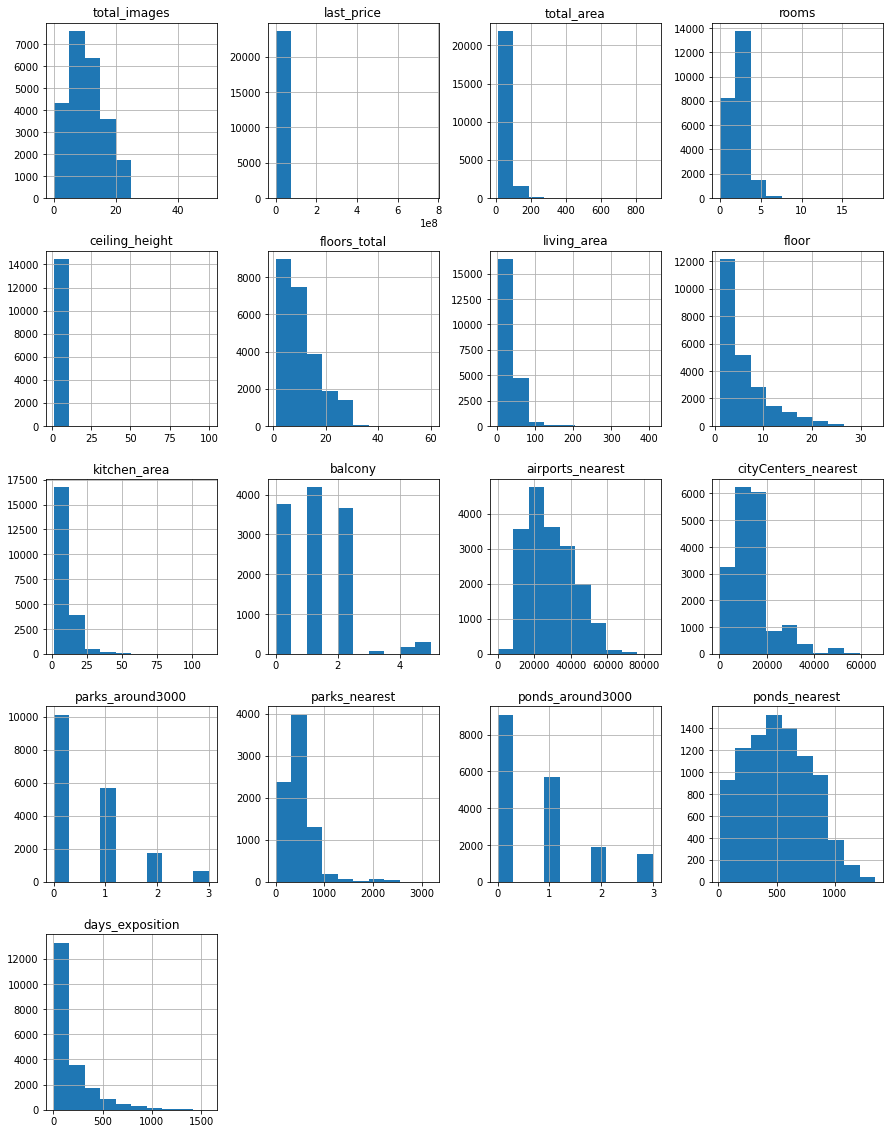

In [4]:
apartment_data.hist(figsize=(15, 20));

Последовательно (слева-направо, сверху-вниз) проанализируем построенные гистограммы. В соответствии с построенными гистограммами по каждому из столбцов можно сделать следующие выводы:
1. Фотографии (`total_images`) присутствуют в каждом объявлении о продаже квартиры (23 699 значений в 23 699 строках), при этом в объявлениях чаще всего присутствует 5-10 и 10-15 фотографий. Число таких объявлений составляет более 7 тыс. и 6 тыс. соответственно.
2. Цена квартиры на момент снятия объявления с публикации (`last_price`) также указана для каждого объявления. Следует отметить, что на гистограмме все цены определены в одну группу (от 0 до 100 млн руб.) из-за формата оси абсцисс 1e8 (8 нулей после единицы), вследствие чего невозможно адекватно оценить объединение значений по диапазонам. Впоследствии необходимо построить отдельную гистограмму для данного столбца с иным форматом оси абсцисс.
3. Общая площадь квартиры в квадратных метрах (`total_area`) указана для всех объявлений. Большая часть квартир имеет площадь до 100 кв. м - число таких объявлений составляет более 20 тыс.
4. Число комнат в квартире (`rooms`) указано для всех объявлений, из которых в 22 тыс. объявлений число комнат в квартире составляет от 1 до 4.
5. Высота потолков в квартире (`ceiling_height`) указана только в 14 504 объявлениях из 23 699, что может свидетельствовать о том, что данный параметр заполняется пользователем вручную перед публикацией объявления, однако он не является обязательным, в связи с чем во многих случаях он остается незаполненным. Также необходимо отметить, что гистограмма отображает только один диапазон данных, что может быть обусловлено небольшим разбросом значений представленных в столбце, и требует проверки.
6. Общее количество этажей в доме (`floors_total`) указано для 23 613 объявлений из 23 699, что говорит о наличии небольшого количества пропущенных значений требующих проверки. Наибольшее количество объявлений зафиксировано для квартир в домах с 1-5 и 5-10 этажами - более 8 тыс. и 7,5 тыс. соответственно. Следует отметить, что тип данных `float` в данном случае является некорректным и требует изменения на `int`, о чем было упомянуто ранее.
7. Жилая площадь квартиры в квадратных метрах (`living_area`) указана для 21 796 объявлений и, аналогично предыдущему пункту, свидетельствует о наличии небольшого количества пропущенных значений, которые требуют проверки. Больше всего объявлений (более 20 тыс.) зафиксировано для квартир с жилой площадью до 50 кв. м.
8. Этаж на котором расположена квартира (`floor`) указан для всех объявлений, при этом наибольшее количество квартир расположено на 1-4 этажах - количество объявлений с такими квартирами составляет около 12 тыс.
9. Площадь кухни в квадратных метрах (`kitchen_area`) указана в 21 421 объявления из 23 699, что говорит о необходимости проверки пропущенных значений в данном столбце. Наибольшее количество объявлений приходится на квартиры с площадью кухни примерно до 15 кв. м - более 16 тыс. объявлений
10. Число балконов в квартире (`balcony`) указано для 12 180 объявлений, что аналогично параметру *`высота потолков`* может говорить о том, что данный параметр заполняется пользователем вручную и не является обязательным, в связи с чем во многих случаях значения в строках отсутствуют. Также данный столбец имеет тип данных `float`, что является неверным и требует изменения на тип `int`. В связи с этим определение диапазона с наибольшим количеством объявлений на данном этапе является затруднительным.
11. Расстояние до ближайшего аэропорта в метрах (`airports_nearest`) указано для 18 157 объявлений. Отсутствие данных по всем объявлениям в некоторых случаях может быть обусловлено большой отдаленностью местоположения квартиры от аэропортов или ошибкой при автоматическом определении расстояния, что требует проверки. Непосредственно наибольшее количество объявлений приходится на квартиры, расположенные в пределах 20 км от аэропортов - их число составляет более 4 тыс.
12. Расстояние до центра города в метрах (`cityCenters_nearest`) указано для 18 180 объявлений. Как и параметр *`расстояние до ближайшего аэропорта в метрах`*, отсутствие данных по некоторым объявлениям предположительно связано со значительным удалением квартиры от центра города или ошибкой при автоматическом определении расстояния, что требует проверки. Больше всего квартир расположено в пределах 10-20 км от центра - количество объявлений в данном случае составляет более 12 тыс.
13. Число парков в радиусе 3 км (`parks_around3000`) указано для 18 181 объявления. Наличие пропусков может быть обусловлено причинами, аналогичными указанным в предыдущих пунктах (11 и 12) и также требует проверки. Для данного столбца установлен тип данных `float`, что является неверным и требует изменения на тип `int`. При этом по первичным наблюдениям наибольшее количество квартир имеет как минимум один парк в радиусе 3 км - число таких объявлений составляет около 10 тыс.
14. Расстояние до ближайшего парка (`parks_nearest`) указано для 8 079 объявлений, что составляет около 1/3 из их общего числа. Присутствие большого количества пропусков в данном случае может быть связано с ошибкой при автоматическом определении расстояния и требует проверки. Большинство квартир в рассматриваемом случае расположено на расстоянии около 500-700 м от ближайшего парка - количество подобных объявлений составляет 4 тыс.
15. Число водоемов в радиусе 3 км (`ponds_around3000`) указано для 18 181 объявления, аналогично числу парков в радиусе 3 км. Наличие пропусков может быть обусловлено причинами, аналогичными указанным в предыдущих пунктах (11, 12, 13) и требует проверки. Для данного столбца также установлен тип данных `float`, что является неверным и требует изменения на тип `int`. При этом по первичным наблюдениям наибольшее количество квартир не имеет водоемов в радиусе 3 км - число таких объявлений составляет более 8 тыс.
16. Расстояние до ближайшего водоема (`ponds_nearest`) указано для 9 110 объявлений. Присутствие большого количества пропусков в данном случае может быть связано с ошибкой при автоматическом определении расстояния и требует проверки. На соответствующей гистограмме можно наблюдать нормальное распределение значений по данному столбцу, при этом большинство квартир в рассматриваемом случае расположено на расстоянии около 500 м от ближайшего водоема - количество подобных объявлений составляет более 1,4 тыс.
17. Сколько дней было размещено объявление (от публикации до снятия) (`days_exposition`) указано для 20 518 объявлений. Ряд объявлений мог быть не снят на момент выгрузки данных, в связи с чем их число не совпадает с общим количеством строк. В данном столбце указано целое количество прошедших дней, в связи с чем применение типа данных `float` является некорректным требует изменения на тип `int`. При этом в большинстве случаев объявления размещались на срок приблизительно до 250 дней - их число составило более 12 тыс.

Таким образом, на основании проведенного анализа было **зафискировано большое количество случаев пропуска данных и наличия неверного типа данных в столбцах, что подтверждает ранее сформированные выводы и требует проведения предобработки данных перед дальнейшими действиями**. Также необходимо проверить данные на наличие неявных дубликатов.

Перед предобработкой данных запишем информацию об изначальном количестве данных, предоставленных для изучения, при помощи метода `shape()`.

In [5]:
apartment_data_shape = apartment_data.shape
print('Размер исходного датафрейма:', apartment_data_shape)
print('Количество строк:', apartment_data_shape[0])
print('Количество столбцов:', apartment_data_shape[1])

Размер исходного датафрейма: (23699, 22)
Количество строк: 23699
Количество столбцов: 22


### Предобработка данных

#### Работа с пропущенными значениями

Как уже было упомянуто ранее, в ряде столбцов зафиксировано наличие пропусков, которые могут оказывать влияние на результаты исследования. Для устранения пропусков просмотрим каждый из столбцов, где они присутствуют, с целью принятия решения о необходимости замены или удаления пропущенных значений. Для этого выведем суммарное количество пропущенных значений по каждому столбцу.

In [6]:
apartment_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

14 столбцов из 22 содержат пропущенные значения. Проверим каждый из них.

Начнем со столбца `ceiling_height` - высота потолков в квартире. Ранее было сформировано предположение о том, что данный параметр заполняется пользователем вручную перед публикацией объявления и не является обязательным для заполнения, в связи с чем в столбце присутствует большое количество пропущенных значений. В данном случае пропуски невозможно заполнить каким-либо значением, в том числе медианным, так как на данный параметр не имеет прямой взаимосвязи с остальными из них, в связи с чем принято решение оставить пропущенные значения. Кроме того, отсутствие информации о высоте потолков в квартире может оказывать влияние на цену объекта.

Столбец `floors_total` - общее количество этажей в доме. Аналогично столбцу `ceiling_height` данный столбец с высокой вероятностью заполняется пользователями вручную. При этом количество пропусков в данном случае является минимальным, что может свидетельствовать о высоком частоте заполнения данного параметра и его важности для пользователей. В связи с крайне небольшим количеством пропусков предлагается удалить их, так как это позволит очистить данные и окажет минимальное влияние на их качество.

In [7]:
# Удаляем пропущенные значения в столбце floors_total при помощи метода dropna
apartment_data = apartment_data.dropna(subset=['floors_total'])

# Проверяем столбец на наличие пропущенных значений
apartment_data['floors_total'].isna().sum()

0

Таким образом мы удалили пропущенные значения из столбца `floors_total`.

Столбец `is_apartment` - апартаменты (булев тип). Отражает, является ли квартира апартаментами или нет. В столбце присутствует значительное количество пропущенных значений, что с высокой вероятностью обусловлено тем, что большинство квартир **не** является апартаментами. Проверим количество уникальных значений в столбце методом `value_counts()`.

In [8]:
# Выведем количество уникальных значений в столбце
display(apartment_data['is_apartment'].value_counts())

# Проверим количество заполненных строк
apartment_data['is_apartment'].count()

False    2725
True       50
Name: is_apartment, dtype: int64

2775

Количество заполненных строк составляет всего лишь 2 775. Большинство заполненных значений говорит о том, что квартира не является апартаментами. В связи с этим, пропущенные значения заменяем на `False`.

In [9]:
# Заменим пропущенные значения в столбце на False
apartment_data['is_apartment'] = apartment_data['is_apartment'].fillna(False)

# Выведем количество уникальных значений в столбце
display(apartment_data['is_apartment'].value_counts())

# Проверим количество заполненных строк
apartment_data['is_apartment'].count()

False    23563
True        50
Name: is_apartment, dtype: int64

23613

После замены пропущенных значений в столбце `is_apartment` количество заполненных строк стало равно их общему числу - 23 613, что является верным.

Столбец `kitchen_area` - площадь кухни в квадратных метрах. Аналогично столбцам `ceiling_height` и `floors_total` данный столбец с высокой вероятностью заполняется пользователями вручную, в связи с чем предполагается оставить пропуски в целях изучения их влияния на формирование цены квартиры.

Столбец `balcony` - отражает количество балконов в квартире. В столбце присутствует большое количество пропущенных значений - около 11,5 тыс., что составляет почти половину от общего количества строк. Проверим количество уникальных значений методом `value_counts` и общую количество заполненных строк методом `count`.

In [10]:
# Выведем количество уникальных значений в столбце
display(apartment_data['balcony'].value_counts())

# Проверим количество заполненных строк
apartment_data['balcony'].count()

1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

12133

Общее количество заполненных строк составляет 12 180. В соответствии с полученными данными можно отметить, что в ряде случаев балкон в квартире отсутствует. Пропущенные значения с высокой вероятностью также могут свидетельствовать о том, что в квартире отсутствует балкон и информация о нем не была указана пользователем. Заменим пропущенные значения на число 0.

In [11]:
# Заменим пропущенные значения в столбце на целое число 0
apartment_data['balcony'] = apartment_data['balcony'].fillna(0)

# Выведем количество уникальных значений в столбце
display(apartment_data['balcony'].value_counts())

# Проверим количество заполненных строк
apartment_data['balcony'].count()

0.0    15193
1.0     4195
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

23613

После замены пропущенных значений в столбце `balcony` количество заполненных строк стало равно их общему числу - 23 613, что является верным.

Столбец `locality_name` - название населенного пункта. В данном случае заполнение пропущенных значений является затруднительным, так как сопоставить расстояние от центра, расстояние до аэропорта или иную величину из исходных данных с определенным населенным пунктом представляет собой крайне сложную задачу. При этом столь незначительное количество пропусков может быть обусловлено как незаполнением пользователями соответствующей информации, так и ошибкой при выгрузке данных. Аналогично столбцу `floors_total`, в связи с крайне небольшим количеством пропусков предлагается удалить их, так как это позволит очистить данные и окажет минимальное влияние на их качество.

In [12]:
# Удаляем пропущенные значения в столбце floors_total при помощи метода dropna
apartment_data = apartment_data.dropna(subset=['locality_name'])

# Проверяем столбец на наличие пропущенных значений
apartment_data['locality_name'].isna().sum()

0

Таким образом мы удалили пропущенные значения из столбца `locality_name`.

Столбцы `airports_nearest` (расстояние до ближайшего аэропорта в метрах), `cityCenters_nearest` (расстояние до центра города в метрах), `parks_around3000` (число парков в радиусе 3 км), `ponds_around3000` (число водоемов в радиусе 3 км). Значения в данных столбцах заполняются автоматически, при этом пропущенные значения могут появляться из-за возникновения ошибок при выгрузке данных или отсутствия информации по конкретным населенным пунктам. **В столбцах присутствует приблизительно одинаковое количество пропусков - 5 542, 5 519, 5 518 и 5 518 соответственно, что может быть свидетельством того, что пропущенные значения связаны с конкретными населенными пунктами, данные по которым отсутствуют, и требует дальнейшего анализа**. В связи с этим, замена пропущенных значений или их удаление в перечисленных столбцах не осуществляется.

В столбцах `parks_nearest` (расстояние до ближайшего парка в метрах), `ponds_nearest` (расстояние до ближайшего водоема в метрах) пропущенные значения присутствуют в 15 620 и 14 589 строках соответственно и в большинстве случаев соответствуют значениям в столбцах `parks_around3000` и `ponds_around3000` также равным 0, за исключением строк, где также присутствуют пропуски. Наличие пропусков в столбцах `parks_nearest` и `ponds_nearest` обусловлено отсутствием в радиусе 3 км парков и водоемов, а также отсутствием соответствующей информации по конкретным населенным пунктам. В связи с этим, предлагается не изменять и не удалять пропуски, так как это может привести к искажению информации.

Столбец `days_exposition` - сколько дней было размещено объявление (от публикации до снятия). Значения в данном столбце заполняются автоматически в зависимости от того, было ли снято объявление с публикации. Пропущенные значения в данном случае свидетельствуют о том, что объявление еще размещено на сайте и не снято на публикации. Замена пропущенных значений или их удаление в данном случае не осуществляется для того, чтобы избежать ситуаций, при которых невозможно будет отделить снятые с публикации объявления от находящихся на сайте.

**Таким образом, мы просмотрели все столбцы с пропущенными значениями и заменили их там, где это было возможно сделать.
Перейдем к рассмотрению типов данных в столбцах.**

#### Работа с типами данными в столбцах

Рассмотрим какие типы данных присутствуют в каждом из столбцов. Для этого воспользуемся атрибутом dtypes.

In [13]:
apartment_data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

В рассматриваемых данных присутствуют столбцы с 4 типами данных:
- `int64` - целые числа;
- `float64` - вещественные числа (в т.ч. дробные);
- `object` - строки;
- `bool` - логические значения.

Проверим, верно ли установлен тип данных для каждого столбца и преобразуем его при выявлении соответствующей необходимости.

Для столбца `total_images` установлен тип данных `int64`, что является верным, так как количество фотографий не может быть дробным числом. Тип данных остается прежним.

Для столбца `last_price` установлен тип данных `float64`, что является верным, если в стоимости указываются копейки, однако в данном случае для всех цен число после запятой равно 0, в связи с чем тип данных можно изменить на `int64`.

In [14]:
# Изменяем тип данных на int64
apartment_data['last_price'] = apartment_data['last_price'].astype(int)

# Проверяем результаты изменения типа данных
apartment_data['last_price'].head(5)

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64

Для столбца `total_area` установлен тип данных `float64`, что является верным, так как площадь квартиры зависит от ее планировки, где размеры комнат могут быть нецелыми (дробными) числами. Тип данных остается прежним.

Для столбца `first_day_exposition` установлен тип данных `object`, что не является верным, так как здесь указаны дата и время публикации объявления о продаже квартиры. Изменим тип данных на `datetime` для верного отображения даты и времени, для чего применим метод `to_datetime()`.

In [15]:
# Проводим замену типа данных с object на datetime
apartment_data['first_day_exposition'] = pd.to_datetime(
    apartment_data['first_day_exposition'], format='%Y-%m-%d %H:%M'
)

# Проверяем как выглядят значения в столбце после изменения типа данных
apartment_data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Замена произведена успешно. При этом необходимо отметить, что информация о времени публикации объявления исчезла из столбца, так как в исходном виде оно везде было равно 00:00:00, что говорит об автоматической публикации объявления в полночь и не влияет на дальнейший анализ.

Для столбца `rooms` установлен тип данных `int64`, что является верным, так как количество комнат не может быть дробным (нецелым) числом. Тип данных остается прежним.

Для столбца `ceiling_height` установлен тип данных `float64`, что является верным, так как высота потолка в квартире варьируется в зависимости от проекта дома, в котором она расположена, и может быть вещественным (дробным) числом. Тип данных остается прежним.

Для столбца `floors_total` установлен тип данных `float64`, что не является верным, так как общее число этажей не может быть дробным числом. Изменим тип данных на `Int64`, так как в столбце присутствуют пропущенные значения.

In [16]:
# Изменяем тип данных на int64
apartment_data['floors_total'] = apartment_data['floors_total'].astype('Int64')

# Проверяем результаты изменения типа данных
apartment_data['floors_total'].head(5)

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: Int64

Для столбца `living_area` установлен тип данных `float64`, что является верным, так как жилая площадь в квартире варьируется в зависимости от ее планировки и может быть дробным числом. Тип данных остается прежним.

Для столбца `floor` установлен тип данных `int64`, что является верным, так как этаж не может быть дробным (нецелым) числом. Тип данных остается прежним.

Для столбцов `is_apartment`, `studio` и `open_plan` установлен тип данных `bool`, что является верным, так как в указанных столбцах отражена информация о соответствии квартиры определенным критериям (является ли квартира апартаментами, является ли квартира студией и имеет ли квартира свободную планировку), которые могут иметь как подтверждение, так и опровержение (значения True или False). Тип данных остается прежним.

Для столбца `kitchen_area` установлен тип данных `float64`, что является верным, так как площадь кухни в квартире варьируется в зависимости от ее планировки и может быть дробным числом. Тип данных остается прежним.

Для столбца `balcony` установлен тип данных `float64`, что не является верным, так как количество балконов в квартире не может быть дробным числом. Изменим тип данных на `Int64`.

In [17]:
# Изменяем тип данных на int64
apartment_data['balcony'] = apartment_data['balcony'].astype(int)

# Проверяем результаты изменения типа данных
apartment_data['balcony'].head(5)

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

Для столбца `locality_name` установлен тип данных `object`, что является верным, так как название населенного пункта является текстовым значением (строкой). Тип данных остается прежним.

Для столбцов `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` установлен тип данных `float64`, что в целом является верным, так как расстояние можно отсчитывать вплоть до сантиметров. Однако, в рассматриваемом случае значения после запятой во всех указанных столбцах равны 0, что говорит о том, что расстояние автоматически рассчитывается с точностью до метра, в связи с чем тип данных можно заменить на `Int64`.

Для столбцов `parks_around3000` и `ponds_around3000` также установлен тип данных `float64`, что является неверным, так как число данных объектов в радиусе 3 км не может быть дробным. Также изменим тип данных для данных столбцов на `Int64`.

Для обоих вышеуказанных случаев воспользуемся множественной заменой типов данных.

In [18]:
# Заменяем тип данных в столбцах на Int64
apartment_data = apartment_data.astype(
    {'airports_nearest': 'Int64', 'cityCenters_nearest': 'Int64', 'parks_nearest': 'Int64',
     'ponds_nearest': 'Int64', 'parks_nearest': 'Int64', 'ponds_nearest': 'Int64', 'parks_around3000': 'Int64',
     'ponds_around3000': 'Int64'}
)

# Проверяем результаты изменения типа данных
apartment_data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest',
                'parks_around3000', 'ponds_around3000']].head(5)

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000
0,18863,16028,482,755,1,2
1,12817,18603,<NA>,<NA>,0,0
2,21741,13933,90,574,1,2
3,28098,6800,84,234,2,3
4,31856,8098,112,48,2,1


Значения по всех вышеперечисленных столбцах теперь имеют тип данных `Int64`.

Наконец, для столбца `days_exposition` установлен тип данных `float64`, что является неверным, так как количество дней, в течение которых было размещено объявление, не может быть дробным. Кроме того, в данном столбце значения после запятой равны 0, в связи с чем целесообразным будет изменить тип данных на `Int64`.

In [19]:
# Изменяем тип данных на Int64
apartment_data['days_exposition'] = apartment_data['days_exposition'].round(0).astype('Int64')

# Проверяем результаты изменения типа данных
apartment_data['days_exposition'].head(5)

0    <NA>
1      81
2     558
3     424
4     121
Name: days_exposition, dtype: Int64

Проверим результаты изменения типов данных для всех столбцов.

In [20]:
apartment_data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  Int64
dtype: object

Теперь все столбцы имеют верный тип данных.

Далее проверим наличие дубликатов в названии населенных пунктов.

#### Поиск дубликатов

Проверим наличие явных и неявных дубликатов в столбце `locality_name`, где указаны названия населенных пунктов. Данный столбец является единственным, где содержатся строковые значения, в связи с чем существует высокая вероятность возникновения дубликатов при его заполнении пользователями.

Выведем уникальные значения в столбце для поиска дубликатов.

In [21]:
apartment_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

На первый взгляд заметны проблемы с буквой `ё` - из-за нее в некоторых местах одинаковые по названию населенные пункты трактуются как разные, что является ошибочным. Также присутствуют одинаковые по смыслу, но разные по написанию типы населенных пунктов, указанных в их названии, в том числе:
- городской поселок и поселок городского типа;
- поселок при железнодорожной станции и поселок станции;
- садовое товарищество и садовое некоммерческое товарищество.

Наконец, присутствуют населенные пункты, у которых изменился их тип, однако присутствуют разные записи, в частности:
- у Мурино и Кудрово с поселков на город;
- у Федоровское с деревни на городской поселок;
- у Рябово с поселка на поселок городского типа;
- у Гарболово с поселка на деревню.

Осуществим замену буквы `ё` на `е`, а также названий населенных пунктов (типов населенных пунктов указанных в названии).
Названия садовых некоммерческих товариществ и коттеджных поселков, а также некоторых деревень, поселков и городов, которые идентичны названиям других населенных пунктов, оставим неизменными, так как они в большинстве случаев расположены в отличных друг от друга местах и не являются одним и тем же населенным пунктом, за исключением ранее перечисленных населенных пунктов. Обновленные названия населенных пунктов поместим в новый столбец `locality_name_new`.

In [22]:
# Заменим названия населенных пунктых
apartment_data['locality_name_new'] = (
    apartment_data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок Мурино', 'Мурино', regex=True)
    .replace('поселок Кудрово', 'Кудрово', regex=True)
    .replace('деревня Федоровское', 'городской поселок Федоровское', regex=True)
    .replace('поселок Рябово', 'поселок городского типа Рябово', regex=True)
    .replace('поселок Гарболово', 'деревня Гарболово', regex=True)
    .replace('городской поселок', 'поселок городского типа', regex=True)
    .replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
    .replace('садовое товарищество', 'садовое некоммерческое товарищество', regex=True)
)

# Снова выведем уникальные значения в столбце
apartment_data['locality_name_new'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово',
       'Коммунар', 'Колпино', 'поселок городского типа Красный Бор',
       'Гатчина', 'поселок городского типа Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое некоммерческое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Ле

Таким образом, мы заменили обнаруженные явные и неявные дубликаты в названиях населенных пунктов и можем переходить к следующему этапу исследования.

### Добавление новых столбцов

Добавим в таблицу несколько новых столбцов, необходимых для дальнейшего определения влияния параметров на цену квартир.

В первую очередь рассчитаем цену одного квадратного метра квартиры, путем деления ее стоимости на общую площадь. Округлим полученное значение до двух знаков после запятой.

In [23]:
# Рассчитаем цену одного квадратного метра в новом столбце
apartment_data['square_meter_price'] = (apartment_data['last_price'] / apartment_data['total_area']).round(2)

# Проверяем результаты расчетов по первым 5 строкам
apartment_data['square_meter_price'].head(5)

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: square_meter_price, dtype: float64

Добавим столбец с днями недели, в которые публиковались объявления.

In [24]:
# Добавляем новый столбец
apartment_data['weekday'] = apartment_data['first_day_exposition'].dt.weekday

# Проверяем вывод данных
apartment_data['weekday'].head(5)

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

Добавим столбец с месяцем публикации объявления.

In [25]:
# Добавляем новый столбец
apartment_data['month'] = apartment_data['first_day_exposition'].dt.month

# Проверяем вывод данных
apartment_data['month'].head(5)

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

Добавим столбец с годом публикации объявления.

In [26]:
# Добавляем новый столбец
apartment_data['year'] = apartment_data['first_day_exposition'].dt.year

# Проверяем вывод данных
apartment_data['year'].head(5)

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

Добавим столбец с типом этажа квартиры со значениями «первый», «последний» и «другой».

In [27]:
# Создадим функцию для отбора значений в столбце floor и присвоения типа этажа в новом столбце
# Для пропущенных значений в столбце floors_total создаем условие try-except, которое будет их пропускать
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'Первый'
        elif row['floor'] == row['floors_total']:
            return 'Последний'
        else:
            return 'Другой'
    except:
        pass

# Создаем новый столбец floor_type, применяем к нему созданную функцию, и изменяем тип данных на строки
# с игнорированием пропусков  
apartment_data['floor_type'] = apartment_data.apply(floor_type, axis=1).astype('str', errors='ignore')

# Проверяем результаты применения функции
apartment_data['floor_type'].head(20)

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
5        Другой
6        Другой
7        Другой
8        Другой
9        Другой
10       Другой
11       Другой
12    Последний
13    Последний
14       Первый
15       Другой
16       Первый
17       Другой
18       Другой
19       Другой
Name: floor_type, dtype: object

Добавим столбец с расстоянием до центра города в километрах, переведя соответствующие значения столбца `cityCenters_nearest` из метров в километры.

In [28]:
# Рассчитаем расстояние до центра города в километрах в новом столбце и округлим его до ближайших целых значений
# Необходимость двойного изменения типа данных обусловлена невозможностью работы метода round
# со столбцом с пропущенными значениями
apartment_data['cityCenters_nearest_km'] = (apartment_data['cityCenters_nearest'] / 1000).astype(float).round(0).astype('Int64')

# Проверяем вывод данных
apartment_data['cityCenters_nearest_km'].head(5)

0    16
1    19
2    14
3     7
4     8
Name: cityCenters_nearest_km, dtype: Int64

После добавления новых столбцов перейдем к исследовательскому анализу данных. 

### Исследовательский анализ данных

#### Изучение и описание параметров квартир

В первую очередь необходимо изучить основные параметры квартир в целях определения наличия в них редких и выбивающихся значений (аномалий), которые могут оказать влияние на исследование.
Последовательно изучим следующий перечень параметров:
- общая площадь (столбец `total_area`);
- жилая площадь (столбец `living_area`);
- площадь кухни (столбец `total_area`);
- цена объекта (столбец `last_price`);
- количество комнат (столбец `rooms`);
- высота потолков (столбец `ceiling_height`);
- тип этажа квартиры («первый», «последний», «другой») (столбец `floor_type`);
- общее количество этажей в доме (столбец `floors_total`);
- расстояние до центра города в метрах (столбец `cityCenters_nearest`);
- расстояние до ближайшего парка (столбец `parks_nearest`).

##### Параметр "общая площадь квартиры"

Рассмотрим столбец `total_area`, где представлены данные об общей площади квартир, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [29]:
# Проверим распределение количества квартир в зависимости от их общей площади
apartment_data['total_area'].value_counts()

45.00     419
42.00     383
31.00     346
60.00     346
44.00     343
         ... 
37.92       1
115.60      1
117.40      1
62.34       1
55.06       1
Name: total_area, Length: 2159, dtype: int64

В соответствии с представленными данными можно отметить, что наибольшее количество квартир имеет общую площадь в размере 45 кв. м - их число составляет 419 ед. Также в данных присутствуют нецелые (дробные) значения, являющиеся единичными случаями, среди которых присутствует квартира с общей площадью более 100 кв. м. Для более наглядного представления данных и упрощения выявления подобных выбросов построим гистограмму с учетом полученного распределения значений по диапазонам.

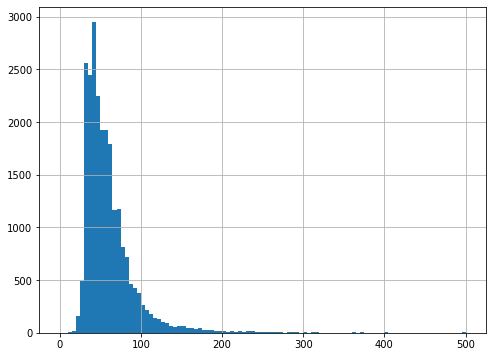

In [30]:
# Построим гистограмму и ограничим ее диапазон общим размером квартир от 0 до 500 кв. м
apartment_data['total_area'].hist(bins=100, range=(0, 500), figsize=(8, 6));

**Гистограмма демонстрирует два пиковых значения для квартир с общей площадью в районе 45 и 42 кв. м. При этом количество квартир общей площадью 200 кв. м и более является небольшим. Присутствуют отдельные выбросы в виде квартир с площадью более 250 кв. м.**

В целом распределение значений стремится к нормальному, однако присутствуют отдельные выбросы значений, которые необходимо проанализировать. Для этого проведем оценку разброса значений при помощи диаграммы размаха.

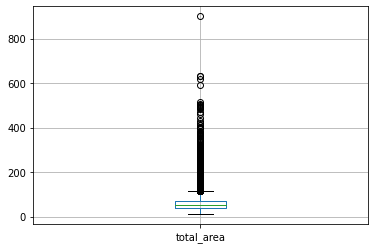

In [31]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data.boxplot(column='total_area');

На диаграмме заметны выбросы значений общей площади квартир вплоть до 900 кв. м, однако сложно выделить какие-либо другие значения. Уменьшим размер диаграммы и снова выведем ее на экран вместе с методом `describe()`.

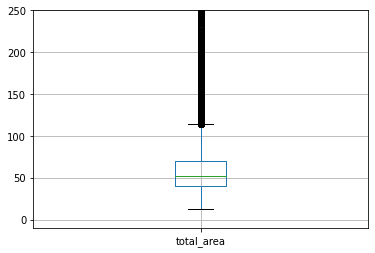

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [32]:
# Импортируем библиотеку matplotlib для расширения возможностей по построению диаграмм
import matplotlib.pyplot as plt

# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
plt.ylim(-10, 250)
apartment_data.boxplot(column='total_area')
plt.show()

# Выводим числовое описание данных, представленных в столбце total_area
apartment_data['total_area'].describe()

Согласно обновленной диаграмме размаха и полученному числовому описанию данных, **большинство значений общей площади квартир находится в диапазоне до 75 кв. м. 1-ый квартиль находится на уровне 40 кв. м, 3-ий квартиль на уровне 69,7 кв. м, тогда как медиана представляет собой значение в 52 квадратных метра. Медиана в данном случае тяготеет к 1-му квартилю, так как значительное число квартир имеет общую площадь в диапазоне 40-45 кв. м, что мы выявили ранее при помощи метода `value_counts()` и построения гистограммы.**

При этом необходимо отметить, что среднее значение лишь немного больше медианы, что говорит о том, что в данных присутствует небольшое количество больших значений, которые напрямую влияют на среднее.

Выведем самые большие значения в столбце `total_area` и проанализируем при помощи метода `sort_values()`.

In [33]:
apartment_data.sort_values(by='total_area', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
19540,8,420000000,900.00,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.00,0,Санкт-Петербург,30706,7877,0,<NA>,2,318,106,Санкт-Петербург,466666.67,2,12,2017,Последний,8
12859,20,140000000,631.20,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.50,1,Санкт-Петербург,25707,4972,0,<NA>,2,210,<NA>,Санкт-Петербург,221799.75,1,4,2019,Последний,5
3117,19,140000000,631.00,2019-03-30,7,NaN,5,NaN,5,False,False,False,60.00,0,Санкт-Петербург,25707,4972,0,<NA>,2,210,<NA>,Санкт-Петербург,221870.05,5,3,2019,Последний,5
15651,20,300000000,618.00,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.00,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,111,Санкт-Петербург,485436.89,0,12,2017,Другой,5
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.00,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,Санкт-Петербург,110169.49,3,2,2019,Другой,5
4237,1,50000000,517.00,2017-10-14,7,NaN,4,332.0,3,False,False,False,22.00,0,Санкт-Петербург,22835,1847,2,477,2,540,<NA>,Санкт-Петербург,96711.80,5,10,2017,Другой,2
8018,20,84000000,507.00,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.50,1,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,1078,Санкт-Петербург,165680.47,3,12,2015,Последний,6
15016,8,150000000,500.00,2016-01-13,4,3.20,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058,6150,3,209,3,531,303,Санкт-Петербург,300000.00,2,1,2016,Последний,6
5893,3,230000000,500.00,2017-05-31,6,NaN,7,NaN,7,False,False,False,40.00,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,50,Санкт-Петербург,460000.00,2,5,2017,Последний,5
12401,20,91500000,495.00,2017-06-19,7,4.65,7,347.5,7,False,False,False,25.00,0,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,14,Санкт-Петербург,184848.48,0,6,2017,Последний,6


Полученная выборка говорит о том, что практически все квартиры с наибольшей общей площадью расположены в Санкт-Петербурге. При этом следует отметить, что **данные квартиры имеют крайне высокую стоимость - 20 млн и даже больше, что может говорить о том, что они относятся к элитному жилью и являются единичным предложением на рынке. Это объясняет наличие аномально высоких значений в исходных данных. Заменять или удалять выявленные выбросы в данном случае не является рациональным, поскольку они отражают определенную категорию жилья.**

Однако, мы можем провести анализ общей площади квартир, исключив столь высокие значения, что и будет сделано далее.

Перед этим сравним распределение значений общей площади квартир по данному городу с общим распределением значений. Для этого сделаем срез данных и построим гистограммы.

In [34]:
# Проверим количество объявлений о продаже квартир в Санкт-Петербурге
spb_data = apartment_data.query('locality_name == "Санкт-Петербург"')
len(spb_data)

15651

Число объявлений о продаже квартир в Санкт-Петербурге составляет более 15,5 тыс., что составляет более 65% от общего числа объявлений. В данном случае распределение значений по Санкт-Петербургу должно совпасть с общим распределением значений. Проверим это при помощи построения двух гистограмм.

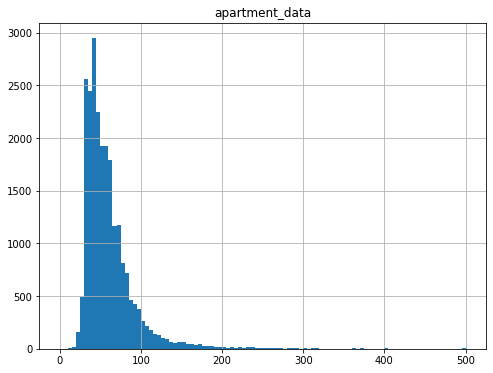

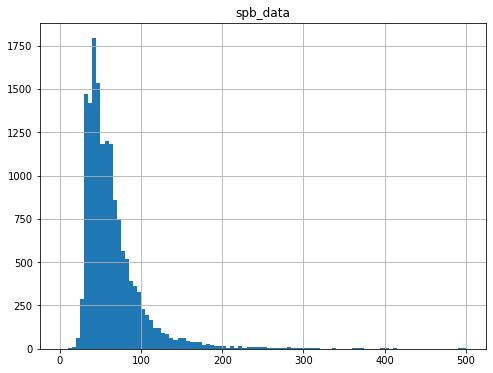

In [35]:
# Построим две гистограммы - по всем населенным пунктам и по Санкт-Петербургу и ограничим их диапазон
# размером квартир от 0 до 500 кв. м
apartment_data['total_area'].hist(bins=100, range=(0, 500), figsize=(8, 6))
plt.title('apartment_data')
plt.show()

spb_data['total_area'].hist(bins=100, range=(0, 500), figsize=(8, 6))
plt.title('spb_data')
plt.show()

Построенные гистограммы подтверждают вывод о том, что распределение значений общей площади квартир по Санкт-Петербургу совпадает с распределением значений по всем населенным пунктам. При этом на гистограмме по данным для Санкт-Петербургу более ярко выражены всплески данных.

Проверим сколько строк данных будет потеряно в случае, если исключить крайне высокие значения общей площади квартир, превышающие 250 кв. м.

In [36]:
# Делим количество квартир с общей площадью более 250 кв. м на общее количество квартир
len(apartment_data.query('total_area > 250')) / len(apartment_data)

0.004710375556970083

**Доля квартир с общей площадью, превышающей 250 кв. м, составляет менее 0,5%, что является крайне незначительным в общем объеме. Таким образом, мы можем спокойно исключить указанные значения для построения соответствующей гистограммы по всем населенным пунктам.**

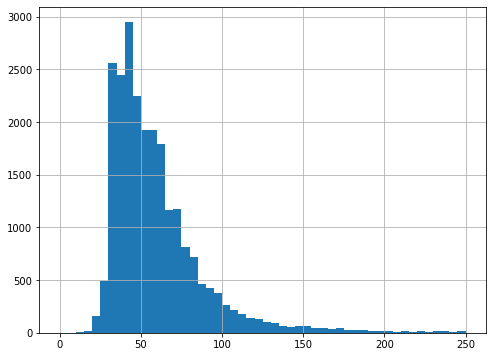

In [37]:
# Построим гистограмму и ограничим ее диапазон размером квартир от 0 до 250 кв. м,
# установив количество диапазонов равным 50
apartment_data['total_area'].hist(bins=50, range=(0, 250), figsize=(8, 6));

**Гистограмма с установленным диапазоном демонстрирует распределение значений общей площади квартир по всем населенным пунктам, аналогичное предыдущим гистограммам, что еще раз подтверждает вывод о том, что выбросы значений в виде квартир с особо большой общей площадью не оказывают существенного влияния на наблюдения.**

##### Параметр "жилая площадь квартиры"

Рассмотрим столбец `living_area`, где представлены данные о жилой площади квартир, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [38]:
# Проверим распределение количества квартир в зависимости от их жилой площади
apartment_data['living_area'].value_counts()

18.00    882
17.00    673
30.00    598
16.00    483
20.00    479
        ... 
43.81      1
54.43      1
86.10      1
99.70      1
16.74      1
Name: living_area, Length: 1769, dtype: int64

В соответствии с представленными данными можно отметить, что наибольшее количество квартир имеет жилую площадь в размере 17-18 кв. м - их число составляет 882 ед. и 673 ед. соответственно. Также в данных присутствуют нецелые (дробные) значения, являющиеся единичными случаями, среди которых присутствует квартира с жилой площадью более 99 кв. м. Для более наглядного представления данных и упрощения выявления подобных выбросов построим гистограмму с учетом полученного распределения значений по диапазонам.

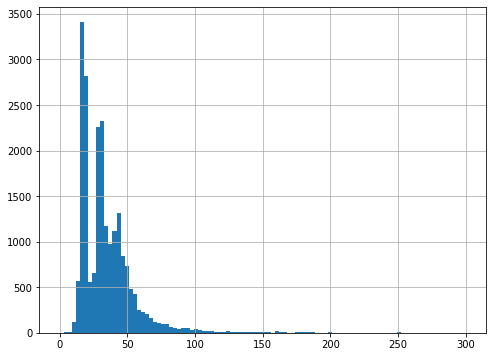

In [39]:
# Построим гистограмму и ограничим ее диапазон размером жилой площади квартир от 0 до 300 кв. м
apartment_data['living_area'].hist(bins=100, range=(0, 300), figsize=(8, 6));

**На построенной гистограмме присутствуют три сильно выделяющихся пика значений, соответствующих 16-18, 20 и 30 квадратным метрам жилой площади. Столь значительное количество значений может быть обусловлено действующими стандартами в области социальных норм жилых помещений. В частности, на территории Санкт-Петербурга действует закон №407-65 «О порядке ведения учёта граждан в качестве нуждающихся в жилых помещениях», которым установлена минимальная норма предоставления — 33 кв. м на одинокого человека и по 18 кв. м для семьи из 2 и более человек, что в данном случае может быть напрямую связано с наличием столь большого числа квартир с указанной жилой площадью или чуть меньше.**

Также присутствуют выбросы в виде значений более 150 кв. м, однако в данном случае не стоит забывать о наличии квартир бизнес-класса, общая площадь которых может существенно превышать стандартные значения. В таком случае и их жилая площадь также будет существенно больше.

Проведем оценку разброса значений при помощи диаграммы размаха.

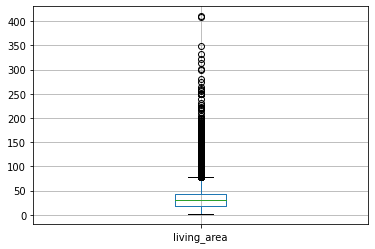

In [40]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data.boxplot(column='living_area');

На диаграмме заметны выбросы значений жилой площади квартир вплоть до более чем 400 кв. м, однако сложно выделить какие-либо другие значения. Уменьшим размер диаграммы и снова выведем ее на экран вместе с методом `describe()`.

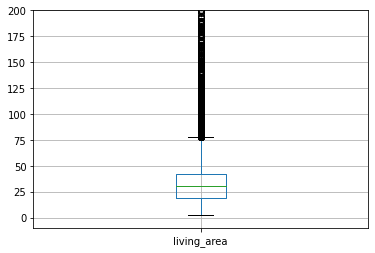

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [41]:
# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
plt.ylim(-10, 200)
apartment_data.boxplot(column='living_area')
plt.show()

# Выводим числовое описание данных, представленных в столбце living_area
apartment_data['living_area'].describe()

В соответствии с обновленной диаграммой размаха и числовым описанием данных, **большинство значений жилой площади квартир находится в диапазоне до 50 кв. м. 1-ый квартиль находится на уровне 18,6 кв. м, 3-ий квартиль на уровне 42,3 кв. м, тогда как медиана представляет собой значение в 30 кв. м. Медиана в данном случае находится не очень далеко от среднего значения, а стандартное отклонение составляет всего около 22 кв. м, что подтверждает предположение о том, что квартир с большой жилой площадью крайне мало, а их основная часть имеет жилую площадь в диапазоне от 15 до 45 кв. м.**

Проверим сколько строк данных будет потеряно в случае, если исключить квартиры с жилой площадью менее 20 кв. м.

In [42]:
# Делим количество квартир с общей площадью менее 20 кв. м на общее количество квартир
len(apartment_data.query('living_area < 20')) / len(apartment_data)

0.2634839804795247

**Доля квартир с жилой площадью менее 20 кв. м составляет более 26%, что является достаточно существенным объемом данных. Изменение или удаление указанных значений приведет к потере значительного количество информации, что является недопустимым. В связи с этим данные в столбце `living_area` оставляем без изменений.**

##### Параметр "площадь кухни квартиры"

Рассмотрим столбец `kitchen_area`, где представлены данные о площади кухонь в квартирах, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [43]:
# Проверим распределение количества квартир в зависимости от площади кухонь
apartment_data['kitchen_area'].value_counts()

6.00     1298
10.00    1259
8.00     1108
9.00     1099
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 963, dtype: int64

Полученные данные свидетельствуют о том, что у большей части квартир размер кухни составляет от 6 до 10 кв. м.
В данных зафискировано наличие нецелых (дробных) значений, которые представляют собой единичные случаи, среди которых присутствует квартира с кухней размером более 16 кв. м. Для более наглядного представления данных и упрощения выявления подобных выбросов построим гистограмму с учетом полученного распределения значений по диапазонам.

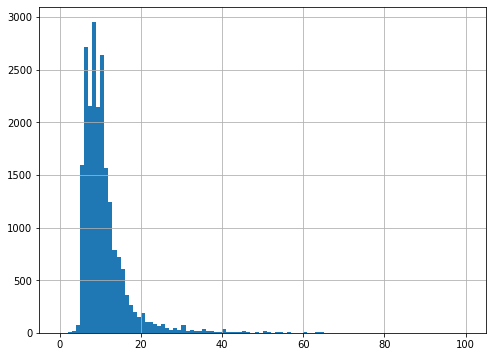

In [44]:
# Построим гистограмму и ограничим ее диапазон размером площади кухонь в квартирах от 0 до 100 кв. м
apartment_data['kitchen_area'].hist(bins=100, range=(0, 100), figsize=(8, 6));

**На гистограмме заметно три сильно выделяющихся пика значений, которые соответствуют 6, 8 и 10 квадратным метрам площади кухонь в квартирах, а их число составляет 1 298, 1 108 и 1 259 квартир соответственно. При этом количество квартир с площадью кухонь в размере 7 и 9 кв. м также является существенным -  1 062 и 1 099 соответственно. Таким образом, у большей части квартир размер кухни составляет от 6 до 10 кв. м, что характерно для массовой застройки, такой как панельные дома, где их площадь варьируется от 7 до 12 кв. м, а также для 5-этажных домов "хрущевок", где площадь кухни может быть от 6 до 10 метров.**

На гистограмме также заметны отдельные значения вплоть до 60-70 кв. м, что может быть характерно для квартир с очень большой площадью.

Оценим разброс значений путем построения диаграммы размаха.

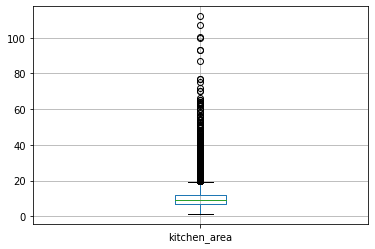

In [45]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data.boxplot(column='kitchen_area');

На диаграмме хорошо заметны отдельные значения, превышающие 100 кв. м, что является крайне высокой величиной.
Уменьшим размер диаграммы и выведем ее на экран вместе с методом describe().

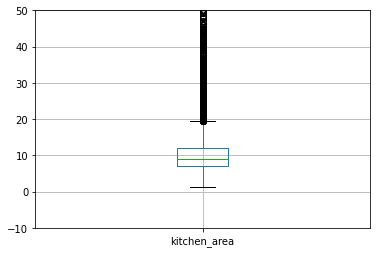

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [46]:
# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
plt.ylim(-10, 50)
apartment_data.boxplot(column='kitchen_area')
plt.show()

# Выводим числовое описание данных, представленных в столбце kitchen_area
apartment_data['kitchen_area'].describe()

В соответствии с данными, представленными на обновленной диаграмме размаха, а также примененному методу `describe()`, **можно сделать вывод о том, что существенная часть значений площади кухонь располагается в диапазоне до 15 кв. м. 1-ый квартиль находится на уровне 7 кв. м, 3-ий квартиль на уровне 12 кв. м. Медиана и среднее имеют очень близкие значения - 9,1 и 10,6 квадратных метра соответственно, что говорит о крайне небольшом количестве выбросов, оказывающих существенное влияние на среднее значение. За исключением квартир с площадью кухонь в размере 7 и 9 кв. м, распределение значений стремится к нормальному. Изменение или удаление данных не требуется.**

##### Параметр "Цена квартиры"

Рассмотрим столбец `last_price`, где представлены данные о стоимости квартир на момент снятия объявления с публикации, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [47]:
# Проверим распределение количества квартир в зависимости от их стоимости
apartment_data['last_price'].value_counts()

4500000     341
3500000     289
4000000     260
4300000     260
4200000     258
           ... 
26391824      1
8353000       1
7501000       1
1320000       1
11615600      1
Name: last_price, Length: 2925, dtype: int64

Полученное распределение значений свидетельствуют о том, что для большого числа квартир стоимость находится в пределах 3,5-4,5 млн. При этом в данных присутствуют отдельные небольшие значения, например 1,3 млн. Построим гистограмму для более наглядного представления данных.

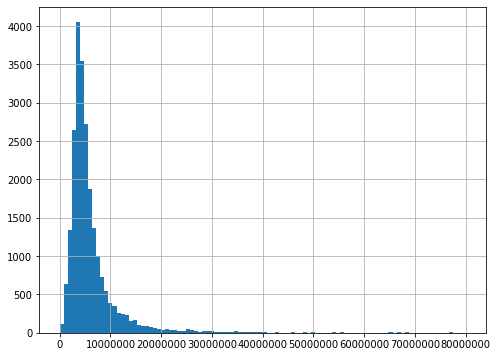

In [48]:
# Построим гистограмму и ограничим ее диапазон стоимостью квартир от 0 до 80 млн
# При этом отобразим числа на оси абсцисс полностью
plt.ticklabel_format(style='plain')
apartment_data['last_price'].hist(bins=100, range=(0, 80000000), figsize=(8, 6));

**Внешне гистограмма имеет нормальное распределение значений. Пик гистограммы приходится на квартиры со стоимостью 4-4,5 млн, их число составляет более 1 тыс. Однако на диаграмме также заметны небольшие всплески значений для квартир со стоимостью в диапазоне от 10 до 30 млн.**

Оценим разброс значений путем построения диаграммы размаха.

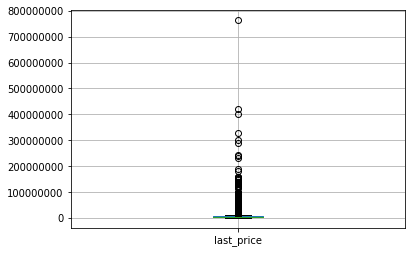

In [49]:
# Строим диаграмму размаха и выводим ее на экран
# При этом отобразим числа на оси абсцисс полностью
plt.ticklabel_format(style='plain')
apartment_data.boxplot(column='last_price');

В соответствии с данными, представленными на диаграмме, можно отметить квартиры со стоимостью, существенно превышающей 10 млн, а в отдельном случае и 75 млн. При этом на первый взгляд большая часть значений находится в пределах стоимости до 10 млн. Проверим это путем уменьшения диаграммы и применения метода describe().

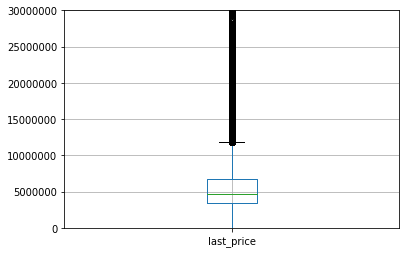

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [50]:
# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
# При этом отобразим числа на оси абсцисс полностью
plt.ylim(-10, 30000000)
plt.ticklabel_format(style='plain')
apartment_data.boxplot(column='last_price')
plt.show()

# Выводим числовое описание данных, представленных в столбце last_price
apartment_data['last_price'].describe()

**Обновленная диаграмма размаха и числовое описание данных говорят о том, что большинство квартир имеют стоимость менее 7,5 млн. В данном случае 1-ый квартиль находится на уровне 3,4 млн, а 3-ий квартиль на уровне 6,8 млн. Для медианы и среднего зафиксированы значения в 4,65 млн и 6,54 млн соответственно, при этом медиана тяготеет к 1-му квартилю, что отражает наличие незначительного количества квартир с очень высокой стоимостью (примерно более 12 млн), оказывающих влияние на среднее значение.**

Проверим самые большие значения в столбце `last_price` при помощи метода `sort_values()`.

In [51]:
apartment_data.sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
12971,19,763000000,400.0,2017-09-30,7,NaN,10,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108,3956,1,530,3,756,33,Санкт-Петербург,1907500.00,5,9,2017,Последний,4
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,<NA>,2,318,106,Санкт-Петербург,466666.67,2,12,2017,Последний,8
14706,15,401300000,401.0,2016-02-20,5,NaN,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912,2389,1,545,1,478,393,Санкт-Петербург,1000748.13,5,2,2016,Последний,2
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011,1197,3,519,3,285,233,Санкт-Петербург,1736842.11,2,4,2018,Другой,1
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,111,Санкт-Петербург,485436.89,0,12,2017,Другой,5
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386,3,188,<NA>,Санкт-Петербург,1542604.80,1,3,2019,Последний,1
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143,6235,3,400,3,140,249,Санкт-Петербург,857542.88,0,4,2017,Другой,6
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,199,Санкт-Петербург,585365.85,5,4,2017,Последний,5
5893,3,230000000,500.0,2017-05-31,6,NaN,7,NaN,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,50,Санкт-Петербург,460000.00,2,5,2017,Последний,5
8900,13,190870000,268.0,2016-03-25,3,NaN,8,132.0,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,901,Санкт-Петербург,712201.49,4,3,2016,Другой,5


Как и в случае с общей площадью квартир, большинство квартир с высокой стоимостью представлено в Санкт-Петербурге. При этом **в данном случае мы видим единственное крайне высокое значение стоимости - оно составляет 763 млн, что больше второго по величине значения стоимости (420 млн) в 1,8 раза. Возможно общая площадь квартиры здесь не является решающим фактором, равно как и близость от центра города, что может свидетельствовать о наличии иных параметров, оказывающих влияние на итоговую стоимость, однако столь высокое значение все равно выглядит подозрительным. Удалим данную строку из данных при помощи метода `drop` и запишем данные в новую переменную в целях сохранения исходных данных в неизменном состоянии.**

In [52]:
# Удаляем строку с индексом 12971, где содержались данные о самой дорогой квартире
apartment_data_filtered = apartment_data.drop(index=[12971]).reset_index(drop=True)

# Выводим первые 20 строк обновленной таблицы для проверки
display(apartment_data_filtered.sort_values(by='last_price', ascending=False).head(20))

# Выводим количество строк, оставшихся после удаления записи о самой дорогой квартире
apartment_data_filtered['last_price'].count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
19430,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,<NA>,2,318,106,Санкт-Петербург,466666.67,2,12,2017,Последний,8
14620,15,401300000,401.0,2016-02-20,5,NaN,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912,2389,1,545,1,478,393,Санкт-Петербург,1000748.13,5,2,2016,Последний,2
1431,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011,1197,3,519,3,285,233,Санкт-Петербург,1736842.11,2,4,2018,Другой,1
15564,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,111,Санкт-Петербург,485436.89,0,12,2017,Другой,5
22700,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386,3,188,<NA>,Санкт-Петербург,1542604.80,1,3,2019,Последний,1
16371,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143,6235,3,400,3,140,249,Санкт-Петербург,857542.88,0,4,2017,Другой,6
13670,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,199,Санкт-Петербург,585365.85,5,4,2017,Последний,5
5863,3,230000000,500.0,2017-05-31,6,NaN,7,NaN,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,50,Санкт-Петербург,460000.00,2,5,2017,Последний,5
8857,13,190870000,268.0,2016-03-25,3,NaN,8,132.0,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,901,Санкт-Петербург,712201.49,4,3,2016,Другой,5
19755,20,180000000,347.0,2015-01-21,8,3.90,6,260.0,3,False,False,False,45.0,0,Санкт-Петербург,23962,3794,2,537,3,501,834,Санкт-Петербург,518731.99,2,1,2015,Другой,4


23564

Запись о квартире со стоимостью 763 млн удалена.

Теперь проверим минимальные значения стоимости квартир на наличие аномалий.

In [53]:
apartment_data_filtered.sort_values(by='last_price').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
8750,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805,0,<NA>,8,Санкт-Петербург,111.83,2,3,2019,Последний,9
17358,7,430000,30.4,2019-04-22,1,NaN,2,16.0,1,False,False,False,6.0,0,Сланцы,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Сланцы,14144.74,0,4,2019,Первый,<NA>
14824,5,430000,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,поселок станции Свирь,7962.96,1,6,2018,Последний,<NA>
16184,18,440000,40.0,2018-07-10,1,NaN,5,NaN,1,False,False,False,NaN,0,деревня Старополье,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,деревня Старополье,11000.00,1,7,2018,Первый,<NA>
17576,0,450000,36.5,2018-02-01,1,NaN,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,120,деревня Ям-Тесово,12328.77,3,2,2018,Другой,<NA>
16129,14,450000,38.5,2018-07-11,2,2.65,2,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,деревня Вахнова Кара,11688.31,2,7,2018,Первый,<NA>
9535,7,450000,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня Старополье,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96,деревня Старополье,10368.66,4,8,2018,Другой,<NA>
5670,7,450000,42.0,2017-07-31,2,NaN,1,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,233,поселок городского типа Будогощь,10714.29,0,7,2017,Первый,<NA>
21786,0,470000,37.0,2018-02-18,1,NaN,3,NaN,3,False,False,False,NaN,0,поселок Совхозный,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,поселок Совхозный,12702.70,6,2,2018,Последний,<NA>
18762,1,470000,41.0,2018-02-11,1,NaN,5,32.0,3,False,False,False,9.0,0,деревня Выскатка,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,46,деревня Выскатка,11463.41,6,2,2018,Другой,<NA>


**Здесь также присутствует аномальное значение. Крайне подозрительным выглядит стоимость квартиры в размере 12 тыс. в Санкт-Петербурге, при общей площади в размере 109 кв. м и удаленности от центра в 9 километров. С высокой вероятностью это могло быть ошибкой ввода пользователем стоимости квартиры. Возможно стоимость должна была составлять около 12 млн. Посмотрим характеристики квартир со стоимостью 12 млн для принятия решения - удалить ли данную запись или скорректировать ее.**

In [54]:
apartment_data_filtered.query('last_price == 12000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
1187,20,12000000,77.60,2019-04-26,2,3.54,3,46.64,3,False,False,False,11.40,0,Санкт-Петербург,24487,4054,1,710,3,272,<NA>,Санкт-Петербург,154639.18,4,4,2019,Последний,4
1910,20,12000000,128.00,2018-09-11,4,2.80,14,63.20,4,False,False,False,30.00,0,Санкт-Петербург,41570,11703,1,493,0,<NA>,4,Санкт-Петербург,93750.00,1,9,2018,Другой,12
2195,9,12000000,99.00,2019-02-27,2,NaN,17,49.00,16,False,False,False,NaN,0,Санкт-Петербург,26293,10466,1,390,0,<NA>,<NA>,Санкт-Петербург,121212.12,2,2,2019,Другой,10
2596,11,12000000,84.68,2017-06-19,2,NaN,9,45.40,8,False,False,False,16.40,0,Санкт-Петербург,32121,5080,0,<NA>,3,457,127,Санкт-Петербург,141709.97,0,6,2017,Другой,5
2604,11,12000000,103.40,2017-09-19,3,3.25,4,61.10,3,False,False,False,10.20,1,Санкт-Петербург,20821,1283,1,287,2,29,201,Санкт-Петербург,116054.16,1,9,2017,Другой,1
3361,8,12000000,141.00,2019-03-27,3,2.70,5,73.00,1,False,False,False,15.20,0,Петергоф,38485,33674,1,240,1,752,13,Петергоф,85106.38,2,3,2019,Первый,34
3732,6,12000000,83.00,2017-12-08,2,NaN,7,28.00,5,False,False,False,26.00,0,Санкт-Петербург,21102,1589,2,476,2,315,507,Санкт-Петербург,144578.31,4,12,2017,Другой,2
4093,12,12000000,55.70,2017-08-02,3,3.00,6,36.00,6,False,False,False,NaN,1,Санкт-Петербург,24117,4526,1,473,0,<NA>,69,Санкт-Петербург,215439.86,2,8,2017,Последний,5
4661,12,12000000,107.40,2018-09-17,4,3.60,6,76.80,2,False,False,False,10.00,1,Санкт-Петербург,23056,2598,0,<NA>,3,707,21,Санкт-Петербург,111731.84,0,9,2018,Другой,3
4991,11,12000000,115.10,2018-02-27,4,2.93,4,70.90,4,False,False,False,16.10,0,Санкт-Петербург,22037,3440,0,<NA>,0,<NA>,90,Санкт-Петербург,104257.17,1,2,2018,Последний,3


**Представленные данные говорят о том, что обнаруженная минимальная стоимость квартиры с высокой вероятностью является ошибкой пользователя, так как характеристики квартир со стоимостью 12 млн имеют приблизительно похожие значения. Таким образом вместо удаления данной строки, заменим ошибочно установленную стоимость квартиры на правильную при метода `replace()`.**

In [55]:
# Заменяем стоимость квартиры
apartment_data_filtered['last_price'] = apartment_data_filtered['last_price'].replace(12190, 12190000, regex=True)

# Проверяем реультат замены путем повторного просмотра минимальной стоимости квартир
display(apartment_data_filtered.sort_values(by='last_price').head(20))

# А также путем поиска строки с измененным значением
apartment_data_filtered[apartment_data_filtered['last_price'] == 12190000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
17358,7,430000,30.4,2019-04-22,1,NaN,2,16.0,1,False,False,False,6.0,0,Сланцы,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Сланцы,14144.74,0,4,2019,Первый,<NA>
14824,5,430000,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,44,поселок станции Свирь,7962.96,1,6,2018,Последний,<NA>
16184,18,440000,40.0,2018-07-10,1,NaN,5,NaN,1,False,False,False,NaN,0,деревня Старополье,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,деревня Старополье,11000.00,1,7,2018,Первый,<NA>
17576,0,450000,36.5,2018-02-01,1,NaN,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,120,деревня Ям-Тесово,12328.77,3,2,2018,Другой,<NA>
9535,7,450000,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня Старополье,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96,деревня Старополье,10368.66,4,8,2018,Другой,<NA>
5670,7,450000,42.0,2017-07-31,2,NaN,1,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,233,поселок городского типа Будогощь,10714.29,0,7,2017,Первый,<NA>
16129,14,450000,38.5,2018-07-11,2,2.65,2,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,деревня Вахнова Кара,11688.31,2,7,2018,Первый,<NA>
21786,0,470000,37.0,2018-02-18,1,NaN,3,NaN,3,False,False,False,NaN,0,поселок Совхозный,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,поселок Совхозный,12702.70,6,2,2018,Последний,<NA>
18762,1,470000,41.0,2018-02-11,1,NaN,5,32.0,3,False,False,False,9.0,0,деревня Выскатка,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,46,деревня Выскатка,11463.41,6,2,2018,Другой,<NA>
23351,11,470000,44.5,2018-07-02,2,NaN,2,28.0,2,False,False,False,7.5,0,Сланцы,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,298,Сланцы,10561.80,0,7,2018,Последний,<NA>


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
8750,7,12190000,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805,0,<NA>,8,Санкт-Петербург,111.83,2,3,2019,Последний,9
16485,19,12190000,100.0,2017-11-23,3,2.90,16,51.0,5,False,False,False,25.0,2,Санкт-Петербург,36765,11777,0,<NA>,0,<NA>,241,Санкт-Петербург,121900.00,3,11,2017,Другой,12


Теперь мы избавились от аномальных значений в столбце `last_price` и можем продолжать исследование других параметров.

##### Параметр "Количество комнат в квартире"

Рассмотрим столбец `rooms`, где представлены данные о количество комнат в квартирах, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [56]:
# Проверим распределение количества квартир в зависимости от количества комнат
apartment_data_filtered['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       58
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В соответствии с представленными данными можно сделать вывод о том, что для большей части квартир характерна планировка с 1-3 комнатами - таких квартир более 20 тыс. Также есть квартиры и с 4 комнатами - их число составляет немногим более 1 тыс.

**Крайне странным выглядит наличие квартир с 0 комнат. В данном случае это может быть либо ошибкой, возникшей при вводе пользователем данных о квартире, либо обусловлено наличием в квартире свободной планировки, в связи с чем количество комнат в таких случаях было принято как число 0. Также маловероятным кажется наличие квартир с более чем 10 комнатами.**

Необходимо проверить выявленные аномалии, но перед этим построим гистограмму для более наглядного представления данных.

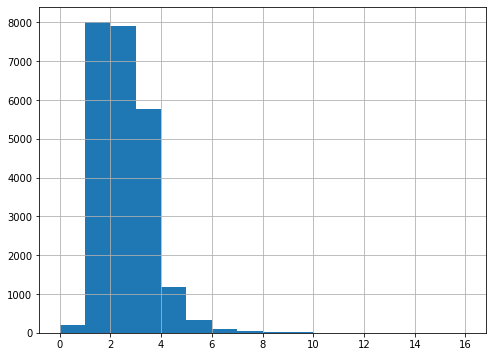

In [57]:
# Построим гистограмму и ограничим ее диапазон квартирами с количеством комнат от 0 до 16
apartment_data_filtered['rooms'].hist(bins=16, range=(0, 16), figsize=(8, 6));

На гистограмме квартиры с более чем 10 комнатами фактически не видны. При этом ярко выражены пики для квартир с 2-4 комнатами.

Оценим разброс значений путем построения диаграммы размаха и метода `describe()`.

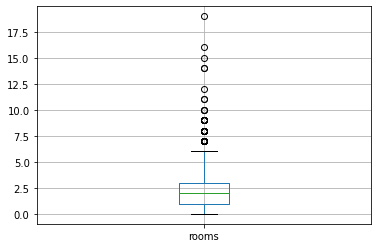

count    23564.000000
mean         2.070446
std          1.078135
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [58]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data_filtered.boxplot(column='rooms');
plt.show()

# Выводим числовое описание данных, представленных в столбце rooms
apartment_data_filtered['rooms'].describe()

Диаграмма размаха отражает наличие единичных выбросов в виде квартир с количеством комнат более 7. При этом **нижний "ус" диаграммы размаха упирается в 0 значение, что обусловлено наличием строк с квартирами, у которых количество комнат равно 0. 1-ый квартиль находится на уровне 1 комнаты, а 3-ий на уровне 3 комнат, при этом медиана и среднее значение фактически равны, что подтверждает вывод о том, что выбросы в виде квартир с более чем 7 комнатами единичные случаи и составляют крайне малую долю от общего числа квартир.**

Последовательно проверим данные - с начала для квартир с 0 комнат, а затем с количеством комнат более 7.

In [59]:
# Выведем строки с данными по квартирам с 0 комнат
display(apartment_data_filtered.query('rooms == 0'))

# Выведем информацию о количестве пропущенных значений для указанных квартир
apartment_data_filtered.query('rooms == 0').isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,True,False,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,181,Мурино,90740.74,3,3,2017,Другой,<NA>
347,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,False,True,NaN,0,деревня Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45,деревня Кудрово,92800.00,2,9,2017,Первый,<NA>
438,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171,15015,0,<NA>,2,982,64,Санкт-Петербург,91479.16,0,3,2018,Другой,15
505,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,False,True,NaN,1,посёлок Парголово,53115,19292,0,<NA>,1,593,430,поселок Парголово,98110.47,1,3,2017,Другой,19
605,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,посёлок Шушары,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,29,поселок Шушары,74000.00,2,2,2019,Другой,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405,13222,0,<NA>,1,623,14,Санкт-Петербург,123076.92,4,9,2017,Другой,13
23309,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,Мурино,90252.71,3,9,2017,Другой,<NA>
23421,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090,17092,0,<NA>,2,112,31,Санкт-Петербург,128846.15,4,9,2018,Другой,17
23458,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,False,True,NaN,2,Никольское,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,Никольское,50000.00,5,11,2017,Другой,<NA>


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            112
floors_total                0
living_area                11
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest           77
cityCenters_nearest        77
parks_around3000           77
parks_nearest             166
ponds_around3000           77
ponds_nearest             126
days_exposition            14
locality_name_new           0
square_meter_price          0
weekday                     0
month                       0
year                        0
floor_type                  0
cityCenters_nearest_km     77
dtype: int64

В соответствии с выведенной информацией можно сделать следующие выводы:
- у всех квартир с 0 комнат отсутствуют данные о площади кухонь;
- у большей части таких квартир отсутствуют данные о высоте потолков;
- менее чем в половине случаев геосервисы не смогли определить расстояние до ближайшего аэропорта, центра города, парков, прудов и их количество для указанных квартир.

**Также необходимо отметить, что в столбцах `studio` и `open_plan` перекликается значение `True`. Если значение `True` присутствует в одном из этих столбцов, то в другом оно отсутствует, и наоборот, а в столбце `is_apartment` во всех случаях присутствует значение `False`. Проверим это путем подсчета значений по каждому из указанных столбцов методом `len`.**

In [60]:
# Подсчитаем количество строк по столбцу studio со значением True
print('Количество строк по столбцу studio со значением True составляет:', len(apartment_data_filtered.query('rooms == 0 and studio == True')))

# Подсчитаем количество строк по столбцу open_plan со значением True
print('Количество строк по столбцу open_plan со значением True составляет:', len(apartment_data_filtered.query('rooms == 0 and open_plan == True')))

# Подсчитаем количество строк по столбцу is_apartment со значением True
print('Количество строк по столбцу is_apartment со значением False составляет:', len(apartment_data_filtered.query('rooms == 0 and is_apartment == False')))

Количество строк по столбцу studio со значением True составляет: 135
Количество строк по столбцу open_plan со значением True составляет: 59
Количество строк по столбцу is_apartment со значением False составляет: 194


Просуммировав первые два числа получаем 194 строки, в которых количество комнат в квартире равно 0. При этом все указанные квартиры не являются апартаментами. **Таким образом предположение о том, что квартиры с 0 комнат имеют открытую планировку или являются квартирами-студиями подтвердилось. В данном случае логичным шагом будет заменить количество комнат с 0 на 1, так как по действующим нормам в квартире должна быть присутствовать хотя бы одна жилая комната. Сделаем это при помощи метода `replace`.**

In [61]:
# Заменяем количество комнат с 0 на 1
apartment_data_filtered['rooms'] = apartment_data_filtered['rooms'].replace(0, 1, regex=True)

# Проверяемм, остались ли квартиры с 0 комнат после замены значений
apartment_data_filtered.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km


Замена прошла успешно.

Вернемся к квартирам с количеством комнат более 7 и ознакомимся с их характеристиками.

In [62]:
# Выведем строки с данными по квартирам с количеством комнат 7 и более и отсортируем их по убыванию
apartment_data_filtered.query('rooms >= 7').sort_values(by='rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
14413,6,32250000,374.6,2018-06-09,19,NaN,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497,3574,0,<NA>,2,548,114,Санкт-Петербург,86091.83,5,6,2018,Другой,4
18743,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575,4142,1,516,0,<NA>,1365,Санкт-Петербург,105555.56,0,3,2015,Последний,4
5330,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,Санкт-Петербург,110169.49,3,2,2019,Другой,5
862,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076,7950,0,<NA>,2,435,418,Санкт-Петербург,68870.52,5,12,2017,Другой,8
20711,6,28659000,245.4,2016-03-31,14,NaN,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104,2054,3,541,2,118,95,Санкт-Петербург,116784.84,3,3,2016,Другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,0,38000000,400.0,2019-03-15,7,3.60,3,NaN,1,False,False,False,NaN,0,Санкт-Петербург,24889,5457,1,271,0,<NA>,<NA>,Санкт-Петербург,95000.00,4,3,2019,Первый,5
5682,17,18000000,171.0,2017-06-16,7,3.38,7,127.7,5,False,False,False,13.0,0,Санкт-Петербург,26345,5048,3,384,1,84,<NA>,Санкт-Петербург,105263.16,4,6,2017,Другой,5
5616,6,27500000,201.0,2017-08-04,7,3.20,5,130.0,2,False,False,False,17.0,0,Санкт-Петербург,24383,5647,1,612,0,<NA>,232,Санкт-Петербург,136815.92,4,8,2017,Другой,6
5423,5,16800000,202.0,2017-11-02,7,3.70,5,145.0,4,False,False,False,20.0,1,Санкт-Петербург,27035,5738,2,467,2,429,268,Санкт-Петербург,83168.32,3,11,2017,Другой,6


Представленные данные говорят о том, что большая часть квартир с количеством комнат 7 и более расположена в Санкт-Петербурге, находится рядом с центром города и имеет крайне высокую стоимость. **Наличие квартир с указанным количеством комнат в центре Санкт-Петербурга может быть обусловлено наличием элитного жилья с большим количеством комнат или выкупом одним человеком одного или нескольких этажей дома в исторической части города и их объединением в одну квартиру, в связи с чем число комнат может составлять 7 и более. Удаление таких квартир из набора данных может привести к потере определенной доли информации о жилье бизнес-класса, расположенного в центре Санкт-Петербурга, в связи с чем указанные данные остаются без изменений и не удаляются.**

##### Параметр "Высота потолков в квартире"

Рассмотрим столбец `ceiling_height`, где представлены данные о высоте потолков в квартирах, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [63]:
# Проверим распределение количества квартир в зависимости от высоты потолка
apartment_data_filtered['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Распределение значений говорит о том, что большая часть квартир имеет высоту потолков от 2,5 до 3 метров - их число составляет около 9 тыс. **Также присутствуют квартиры с более высокими потолками, вплоть до 10,3 метров, что является сильно выделяющимся значением из остальных**.

Проверим данные на наличие других подобных аномалий. Для этого в первую очередь построим гистограмму. 

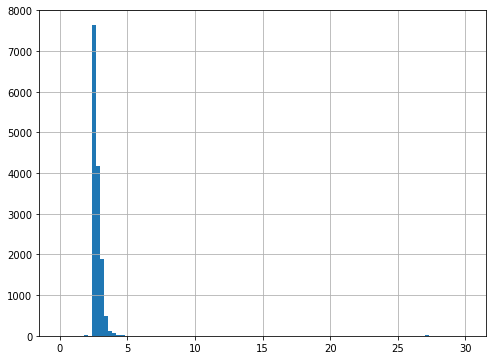

In [64]:
# Построим гистограмму и ограничим ее диапазон квартирами с высотой потолка от 0 до 30
apartment_data_filtered['ceiling_height'].hist(bins=100, range=(0, 30), figsize=(8, 6));

На первый взгляд аномалии отсутствуют, однако, если посмотреть внимательнее, заметны выбросы в районе 2 и 27 метров. Рассмотрим данные при помощи диаграммы размаха.

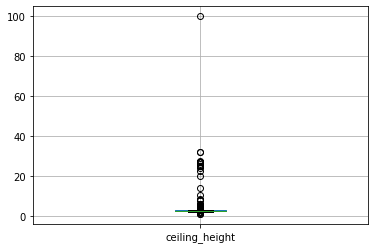

In [65]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data_filtered.boxplot(column='ceiling_height');

**На диаграмме заметны выбросы значений высоты потолков квартир вплоть до более чем 100 метров, при этом часть значений находится между 20 и 40 метрами, что выглядит подозрительно.**

Уменьшим размер диаграммы и снова выведем ее на экран вместе с методом `describe()`.

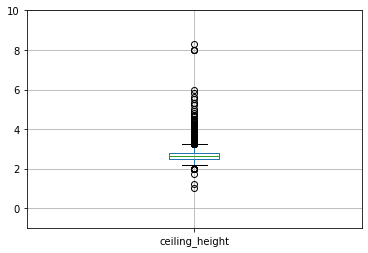

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [66]:
# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
plt.ylim(-1, 10)
apartment_data_filtered.boxplot(column='ceiling_height')
plt.show()

# Выводим числовое описание данных, представленных в столбце ceiling_height
apartment_data_filtered['ceiling_height'].describe()

**Новая диаграмма размаха и числовое описание данных свидетельствуют о том, что 1-ый и 3-ий квартили имеют значения, соответствующие ранее полученному распределению значений - 2,5 и 2,8 метра соответственно. Также медиана и среднее имеют относительно близкие значения - 2,65 и 2,77 метра соответственно. При этом максимально зафиксированное значение равно 100 метрам, а минимальное 1, что с высокой вероятностью говорит о наличии ошибок в данных.**

Рассмотрим характеристики квартир с наибольшей высотой потолков и проанализируем их при помощи метода `sort_values()`.

In [67]:
apartment_data_filtered.sort_values(by='ceiling_height', ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
22738,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19,Санкт-Петербург,600000.00,2,7,2018,Последний,8
3134,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Волхов,38666.67,0,11,2018,Другой,<NA>
22210,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838,3506,0,<NA>,3,511,<NA>,Санкт-Петербург,108214.29,4,4,2019,Другой,4
21255,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742,9760,0,<NA>,0,<NA>,61,Санкт-Петербург,116666.67,1,4,2017,Другой,10
20363,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,False,False,10.0,1,Санкт-Петербург,18975,3246,0,<NA>,3,449,429,Санкт-Петербург,177777.78,1,7,2017,Другой,3
22806,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,False,False,9.0,1,деревня Нижняя,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,27,деревня Нижняя,40816.33,3,3,2018,Последний,<NA>
21699,20,2450000,44.0,2019-02-12,2,27.0,2,38.0,2,False,False,False,8.6,2,городской поселок Большая Ижора,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,поселок городского типа Большая Ижора,55681.82,1,2,2019,Последний,<NA>
4852,7,3000000,25.0,2017-09-27,1,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28,Мурино,120000.00,2,9,2017,Другой,<NA>
10713,8,3800000,58.0,2017-10-13,2,27.0,10,30.1,3,False,False,False,8.1,2,посёлок Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,71,Мурино,65517.24,4,10,2017,Другой,<NA>
17755,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,NaN,0,Санкт-Петербург,41030,15543,0,<NA>,0,<NA>,73,Санкт-Петербург,69642.86,4,12,2017,Другой,16


**При более подробном анализе были выявлены квартиры с высотой потолков более 20 метров, что выглядит нереалистичным. Никакой прямой связи с наличием таких значений не наблюдается. Наличие указанных аномалий может быть связано с ошибкой ввода пользователями информации о высоте потолка и ее завышении - представленные значения больше похожи на вещественные, чем на целые числа. Заменим значения высоты потолка в 20 кв. м и более на вещественные значения при помощи метода `replace()`.**

In [68]:
# Заменяем высоту потолков
apartment_data_filtered.update(apartment_data_filtered[(apartment_data_filtered['ceiling_height'] >= 20) & (apartment_data_filtered['ceiling_height'] <= 36)]['ceiling_height']/10)

# Проверяем, остались ли квартиры с высотой потолков более 14 метров
apartment_data_filtered.query('ceiling_height > 14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
22738,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19,Санкт-Петербург,600000.0,2,7,2018,Последний,8


Замена значений произведена успешно.

Теперь проверим наименьшие значения в столбце `ceiling_height`.

In [70]:
apartment_data_filtered.sort_values(by='ceiling_height').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
22462,16,6000000,55.00,2018-10-31,2,1.00,12,32.400000,7,False,False,False,10.00,0,Санкт-Петербург,33053,14217,2,293,2,289,13,Санкт-Петербург,109090.91,2,10,2018,Другой,14
5683,5,1500000,42.80,2017-08-14,2,1.20,2,27.500000,1,False,False,False,5.20,0,городской посёлок Мга,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,248,поселок городского типа Мга,35046.73,0,8,2017,Первый,<NA>
16836,5,4100000,40.00,2017-10-17,1,1.75,37,17.400000,5,False,False,False,8.34,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,71,Санкт-Петербург,102500.00,1,10,2017,Другой,20
18991,7,2700000,56.00,2018-02-04,3,2.00,5,46.000000,1,False,False,False,6.00,0,Выборг,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,282,Выборг,48214.29,6,2,2018,Первый,<NA>
17398,15,6700000,92.90,2019-02-19,3,2.00,17,53.200000,14,False,False,False,12.00,5,Санкт-Петербург,16295,15092,1,967,0,<NA>,<NA>,Санкт-Петербург,72120.56,1,2,2019,Другой,15
5820,9,1650000,35.50,2018-05-29,1,2.00,5,NaN,5,False,False,False,NaN,0,Луга,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,Луга,46478.87,1,5,2018,Последний,<NA>
20405,9,3600000,38.00,2018-07-05,1,2.00,12,15.000000,9,False,False,False,11.80,1,Кудрово,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,62,Кудрово,94736.84,3,7,2018,Другой,<NA>
16786,0,1500000,33.00,2018-10-03,1,2.00,5,20.000000,5,False,False,False,6.00,0,Выборг,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6,Выборг,45454.55,2,10,2018,Последний,<NA>
4191,1,2120000,35.43,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.80,2,Тосно,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,36,Тосно,59836.30,0,12,2017,Другой,<NA>
549,11,2999000,33.50,2017-03-30,1,2.00,15,17.500000,6,False,False,False,6.50,0,Санкт-Петербург,33972,11746,1,520,1,949,270,Санкт-Петербург,89522.39,3,3,2017,Другой,12


**Здесь также присутствуют аномальные значения - 1 метр, 1,2 метра и 1,75 метра, что с высокой вероятностью также связано с неправильным вводом данных пользователями. При этом при анализе стоимости и общей площади данной квартир можно отметить, что в данном случае высота потолков должна быть больше. Также необходимо отметить, что в данных присутствуют квартиры с потолками всего 2 метра, что в ряде случаев характерно для небольших населенных пунктов. Заменим 3 вышеуказанных значениях на 10, 12 и 10.75 метра соответственно.**

In [71]:
# Заменяем высоту потолков
apartment_data_filtered.update(apartment_data_filtered[(apartment_data_filtered['ceiling_height'] >= 1) & (apartment_data_filtered['ceiling_height'] <= 1.75)]['ceiling_height']*10)

# Проверяем, остались ли квартиры с высотой потолков менее 2 метров
apartment_data_filtered.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km


Таким образом, мы провели замену всех аномальных значений в столбце `ceiling_height`.

##### Параметр "Тип этажа квартиры"

Рассмотрим столбец `floor_type`, где представлены данные о типе этажей квартир (первый, последний, другой), и проанализируем их при помощи метода `value_counts()` и гистограммы.

In [72]:
# Проверим распределение количества квартир в зависимости от типа этажа
apartment_data_filtered['floor_type'].value_counts()

Другой       17326
Последний     3329
Первый        2909
Name: floor_type, dtype: int64

Представленное распределение значений свидетельствует о том, что большинство квартир в объявлениях расположено между первым и последним этажами дома. Их число составляет более 17 тыс. Количество квартир, расположенных на первом и последнем этажах, является сопоставимым - около 2,9 тыс. и 3,3 тыс. соответственно. **Наличие столь значительного числа квартир, для которых установлен тип этажа "другой", обусловлено тем, что большинство жилых домов, в частности современной постройки, имеет этажность более 10 этажей.**

Наглядно рассмотрим распределение значений на гистограмме.

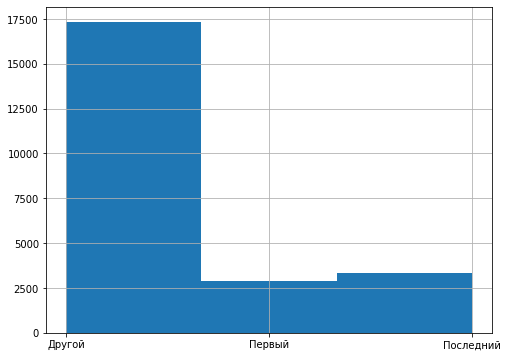

In [73]:
# Построим гистограмму с типами квартир
apartment_data_filtered['floor_type'].hist(bins=3, range=(0, 2), figsize=(8, 6));

**Поскольку в данном случае в столбце присутствуют только категориальные значения, которые мы присвоили квартирам в зависимости от их расположения на конкретном этаже в доме, выбросов и аномальных значений не зафиксировано. В связи с этим, изменение или удаление данных не требуется.**

##### Параметр "Общее количество этажей в доме"

Рассмотрим столбец `floors_total`, где представлены данные об общем количестве этажей в доме, где расположены квартиры и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [74]:
# Проверим распределение количества квартир в зависимости от количества этажей в доме
apartment_data_filtered['floors_total'].value_counts()

5     5775
9     3758
16    1375
12    1361
4     1193
10    1173
25    1075
6      910
17     833
3      667
7      589
14     553
18     505
24     462
8      388
2      381
15     365
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
52       1
29       1
33       1
37       1
Name: floors_total, dtype: Int64

В соответствии с полученным распределением значений можно сделать вывод о том, что большая часть квартир расположена в 5 и 9-этажных домах, вероятно советской постройки - их число составляет около 5,8 тыс. и 3,8 тыс. соответственно. Также присутствуют данные и по более высоким домам. 

Наглядно рассмотрим распределение значений на гистограмме.

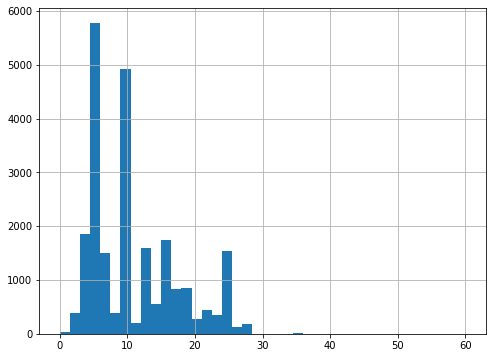

In [75]:
# Построим гистограмму с количеством этажей в домах
apartment_data_filtered['floors_total'].hist(bins=40, range=(0, 60), figsize=(8, 6));

Гистограмма отражает наличие разрозненных пиковых значений вследствие неоднородности этажности городской застройки Санкт-Петербурга.

Построим диаграмму размаха для более точной оценки разброса значений.

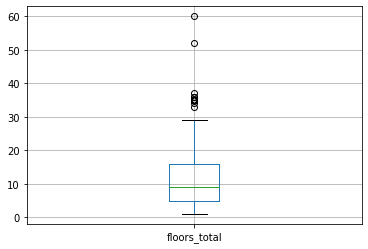

count    23564.000000
mean        10.675904
std          6.594962
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [76]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data_filtered.boxplot(column='floors_total');
plt.show()

# Выводим числовое описание данных, представленных в столбце ceiling_height
apartment_data_filtered['floors_total'].describe()

**На диаграмме размаха присутствуют выбросы значений около 50 и 60 этажей. Одно из самых высоких жилых зданий в Санкт-Петербурге на данный момент - ЖК "Князь Александр Невский", где количество этажей составляет 37. В связи с этим два вышеуказанных значения выглядят нереалистично, а выбросы в районе 30-40 этаже не являются ошибками.**

Проанализируем квартиры, расположенные в домах с 50 этажами и выше для оценки их характеристик и сопоставления с другими квартирами при помощи метода `sort_values`.

In [77]:
apartment_data_filtered.sort_values(by='floors_total', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
2245,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.40,0,Кронштадт,67763,49488,2,342,3,614,166,Кронштадт,83516.48,3,6,2018,Другой,49
16634,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.00,0,Санкт-Петербург,20728,12978,1,793,0,<NA>,45,Санкт-Петербург,99450.00,0,9,2018,Другой,13
16836,5,4100000,40.0,2017-10-17,1,17.50,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,71,Санкт-Петербург,102500.00,1,10,2017,Другой,20
5777,17,8150000,80.0,2019-01-09,2,2.70,36,41.0,13,False,False,False,12.00,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38,Санкт-Петербург,101875.00,2,1,2019,Другой,20
11017,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.00,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,Санкт-Петербург,122666.67,4,2,2019,Другой,20
395,15,5990000,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.70,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11,Санкт-Петербург,110925.93,3,3,2018,Другой,20
13895,19,6990000,65.0,2018-10-06,2,NaN,35,32.1,23,False,False,False,8.90,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,89,Санкт-Петербург,107538.46,5,10,2018,Другой,20
2953,9,4300000,37.0,2017-08-08,1,NaN,35,14.0,15,False,False,False,10.40,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,50,Санкт-Петербург,116216.22,1,8,2017,Другой,20
9141,7,6500000,49.1,2019-04-12,1,2.50,35,31.0,3,False,False,False,7.00,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,3,Санкт-Петербург,132382.89,4,4,2019,Другой,20
1911,13,10150000,74.0,2017-11-17,2,2.80,35,34.4,30,False,False,False,13.00,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,Санкт-Петербург,137162.16,4,11,2017,Другой,20


**На основании представленных данных затруднительно выявить квартиры, сопоставимые по характеристикам с вышеуказанными, в связи с чем предлагается удалить 2 выявленных аномальных значения при помощи метода `drop`.**

In [78]:
# Удаляем строку с индексом 2253, где содержались данные о квартире в 60-этажном доме без реиндексации,
# так как нам необходимо будет удалить еще одну строку
apartment_data_filtered = apartment_data_filtered.drop(index=[2245])

# Удаляем строку с индексом 16730, где содержались данные о квартире в 52-этажном доме и делаем реиндексацию
apartment_data_filtered = apartment_data_filtered.drop(index=[16634]).reset_index(drop=True)

# Выводим первые 20 строк обновленной таблицы для проверки
apartment_data_filtered.sort_values(by='floors_total', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
16834,5,4100000,40.0,2017-10-17,1,17.50,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,71,Санкт-Петербург,102500.00,1,10,2017,Другой,20
5776,17,8150000,80.0,2019-01-09,2,2.70,36,41.0,13,False,False,False,12.00,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38,Санкт-Петербург,101875.00,2,1,2019,Другой,20
395,15,5990000,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.70,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11,Санкт-Петербург,110925.93,3,3,2018,Другой,20
11016,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.00,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,Санкт-Петербург,122666.67,4,2,2019,Другой,20
1056,10,5200000,50.0,2015-11-06,2,NaN,35,39.0,15,False,False,False,20.50,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,281,Санкт-Петербург,104000.00,4,11,2015,Другой,20
20818,18,9900000,100.9,2019-04-08,3,NaN,35,53.4,22,False,False,False,13.40,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,Санкт-Петербург,98116.95,0,4,2019,Другой,20
5777,12,4590000,43.0,2018-10-19,1,NaN,35,14.0,11,False,False,False,15.00,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,82,Санкт-Петербург,106744.19,4,10,2018,Другой,20
867,14,7777777,75.0,2017-11-16,2,NaN,35,40.5,23,False,False,False,11.70,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,169,Санкт-Петербург,103703.69,3,11,2017,Другой,20
5719,20,3590000,25.0,2017-08-30,1,2.80,35,NaN,26,False,False,True,NaN,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,198,Санкт-Петербург,143600.00,2,8,2017,Другой,20
9532,9,3450000,24.8,2019-02-01,1,2.68,35,16.0,17,False,True,False,NaN,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,45,Санкт-Петербург,139112.90,4,2,2019,Другой,20


Аномальные значения успешно удалены. Остальные данные оставляем без изменений.

##### Параметр "Расстояние до центра города в метрах"

Рассмотрим столбец `cityCenters_nearest`, где представлены данные о расстоянии от квартир до центра города в метрах, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [79]:
# Проверим распределение количества квартир в зависимости от расстояния до центра города
apartment_data_filtered['cityCenters_nearest'].value_counts()

8460     61
20802    32
10720    30
8434     27
20444    27
         ..
50485     1
12046     1
12521     1
3866      1
2047      1
Name: cityCenters_nearest, Length: 7621, dtype: Int64

Распределение значений свидетельствует о наличии разброса в расстоянии от квартиры до центра города, что в частности обусловлено  значительным количеством пропущенных значений в столбце - количество заполненных строк составляет всего лишь 7,6 тыс. из 23,7 тыс. При этом большинство квартир расположено на расстоянии 8,4 тыс. м от центра города.

Для более наглядного представления распределения значений построим гистограмму.

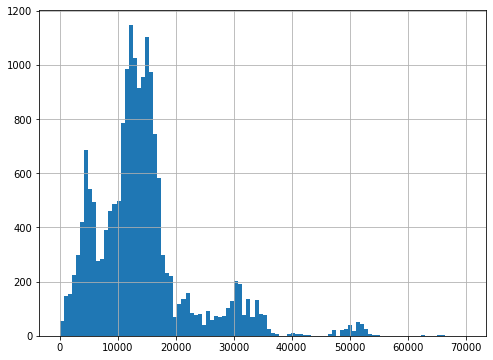

In [80]:
# Построим гистограмму с расстоянием от местоположения квартир до центра города
apartment_data_filtered['cityCenters_nearest'].hist(bins=100, range=(0, 70000), figsize=(8, 6));

**На гистограмме наблюдается значительный разброс значений - от 0 до 65 тыс. м от центра города. При этом большая часть квартира расположена в пределах 10-20 тыс. м от центра города**. Также присутствует небольшой пик значений на расстоянии около 5 тыс. м от центра.

Необходимо построить диаграмму размаха для проверки разброса значений.

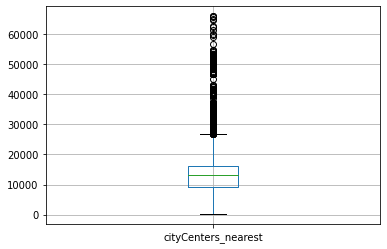

In [81]:
# Строим диаграмму размаха и выводим ее на экран
apartment_data_filtered.boxplot(column='cityCenters_nearest');

**Диаграмма демонстрирует наличие большого количества значений, превышавших 30 тыс. м, при этом нижний "ус" упирается в 0 значение, что похоже на аномальные значения.**

Уменьшим размер диаграммы и снова выведем ее на экран вместе с методом `describe()`.

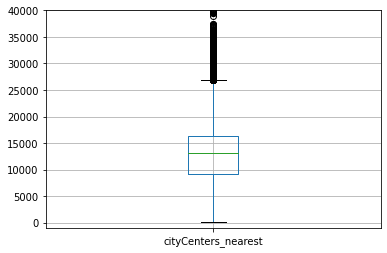

count    18061.000000
mean     14191.335862
std       8609.716926
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [82]:
# Строим диаграмму размаха с измененным масштабом вертикальной оси и выводим ее на экран
plt.ylim(-1000, 40000)
apartment_data_filtered.boxplot(column='cityCenters_nearest')
plt.show()

# Выводим числовое описание данных, представленных в столбце cityCenters_nearest
apartment_data_filtered['cityCenters_nearest'].describe()

**Согласно обновленной диаграмме размаха и числовому описанию данных, большинство значений расстояния от квартир до центра города находится в диапазоне до 20 тыс. м. 1-ый квартиль находится на уровне 9 тыс. м, 3-ий квартиль на уровне 16 тыс. м. Медиана и среднее находятся на приблизительно одном уровне, при этом медиана тяготеет к 3-му квартилю, так как в данных присутствует существенное количество значений, превышающих 15 тыс. м.**

Необходимо рассмотреть минимальные и максимальные значения по столбцу `cityCenters_nearest` для проверки на наличие аномальных значений при помощи метода `sort_values()`.

In [83]:
apartment_data_filtered.sort_values(by='cityCenters_nearest', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
9593,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,False,6.0,1,посёлок Молодёжное,84869,65968,0,<NA>,0,<NA>,1194,поселок Молодежное,81712.06,2,12,2014,Другой,66
5312,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,False,False,7.0,1,посёлок Молодёжное,84853,65952,0,<NA>,0,<NA>,<NA>,поселок Молодежное,71146.25,1,3,2019,Другой,66
574,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,False,False,7.0,0,посёлок Молодёжное,84665,65764,0,<NA>,0,<NA>,<NA>,поселок Молодежное,67796.61,6,7,2017,Первый,66
20626,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,False,False,5.0,1,посёлок Молодёжное,84006,65105,0,<NA>,0,<NA>,1043,поселок Молодежное,75862.07,1,2,2016,Другой,65
5190,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,False,False,5.2,0,посёлок Молодёжное,83758,64857,0,<NA>,0,<NA>,121,поселок Молодежное,67843.87,0,9,2018,Другой,65
18777,15,3600000,57.6,2019-02-08,3,2.55,3,41.3,2,False,False,False,6.5,1,Зеленогорск,81607,62706,0,<NA>,0,<NA>,13,Зеленогорск,62500.00,4,2,2019,Другой,63
2960,13,3200000,46.3,2018-03-31,2,2.50,3,29.2,2,False,False,False,7.0,1,Зеленогорск,81355,62454,0,<NA>,0,<NA>,205,Зеленогорск,69114.47,5,3,2018,Другой,62
16474,13,3200000,52.8,2017-06-20,2,2.55,5,29.9,3,False,False,False,8.3,0,Ломоносов,53042,61495,2,223,0,<NA>,240,Ломоносов,60606.06,1,6,2017,Другой,61
22989,0,1800000,32.0,2018-07-17,1,NaN,2,17.0,1,False,False,False,6.0,0,Ломоносов,56896,60223,1,17,0,<NA>,147,Ломоносов,56250.00,1,7,2018,Первый,60
4419,6,2300000,31.0,2016-05-26,1,NaN,3,12.0,1,False,False,False,9.0,0,Зеленогорск,78527,59626,0,<NA>,0,<NA>,232,Зеленогорск,74193.55,3,5,2016,Первый,60


**В соответствии с представленными данными можно сделать вывод о том, что расстояние до центра города рассчитывается от расположения квартиры в различных населенных пунктах до центра Санкт-Петербурга, в связи с чем в данных присутствуют значения более 60 тыс. м. Таким образом указанные значения не являются аномальными и не требуют изменения или удаления.**

Проверим квартиры расположенные на минимальном расстоянии от центра Санкт-Петербурга методом `sort_values`.

In [84]:
apartment_data_filtered.sort_values(by='cityCenters_nearest').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,square_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km
13614,2,31099000,159.0,2018-06-25,5,3.28,5,106.0,5,False,False,False,15.0,0,Санкт-Петербург,21633,181,2,254,3,426,<NA>,Санкт-Петербург,195591.19,0,6,2018,Последний,0
1177,1,5800000,33.6,2016-03-10,1,3.70,7,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632,208,3,304,3,503,167,Санкт-Петербург,172619.05,3,3,2016,Другой,0
8570,7,10990000,100.0,2015-12-16,3,3.90,5,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818,215,3,229,2,511,265,Санкт-Петербург,109900.00,2,12,2015,Другой,0
1927,18,9590000,108.0,2017-05-23,2,3.30,5,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908,287,3,359,3,290,69,Санкт-Петербург,88796.30,1,5,2017,Другой,0
20753,18,11500000,113.5,2018-09-17,3,4.20,7,44.2,6,False,False,False,21.7,1,Санкт-Петербург,21739,291,2,472,2,94,<NA>,Санкт-Петербург,101321.59,0,9,2018,Другой,0
1104,1,34878556,95.8,2014-12-09,2,NaN,6,58.3,5,True,False,False,20.0,1,Санкт-Петербург,21860,318,2,160,3,569,1572,Санкт-Петербург,364076.78,1,12,2014,Другой,0
7685,20,50000000,93.0,2019-04-18,2,NaN,7,40.0,4,False,False,False,28.0,2,Санкт-Петербург,21860,318,2,160,3,569,<NA>,Санкт-Петербург,537634.41,3,4,2019,Другой,0
11423,1,46424072,92.4,2014-12-09,2,NaN,6,54.8,6,True,False,False,20.0,1,Санкт-Петербург,21860,318,2,160,3,569,1030,Санкт-Петербург,502425.02,1,12,2014,Последний,0
11654,18,32500000,127.1,2015-01-15,3,3.40,6,56.2,2,False,False,False,51.8,0,Санкт-Петербург,21860,318,2,160,3,569,725,Санкт-Петербург,255704.17,3,1,2015,Другой,0
5269,19,45000000,96.0,2018-11-15,2,3.20,6,NaN,4,True,False,False,45.0,1,Санкт-Петербург,21860,318,2,160,3,569,<NA>,Санкт-Петербург,468750.00,3,11,2018,Другой,0


**Минимально зафиксированные значения по столбцу `cityCenters_nearest` говорят о наличии квартир в непосредственной близости от центра города, что характерно для элитного жилья. В данном случае это предположение подтверждается высокой стоимостью квартир, которые расположены в центре города. Таким образом минимальные значения в данном столбце также не являются аномальными и не требуют изменения или удаления.**

##### Параметр "Расстояние до ближайшего парка"

Рассмотрим столбец `parks_nearest`, где представлены данные о расстоянии от квартиры до ближайшего к ним парка в метрах, и проанализируем их при помощи метода `value_counts()` и гистограммы, а также метода `describe()` и диаграммы размаха.

In [85]:
# Проверим распределение количества квартир в зависимости от расстояния до ближиайшего к ним парка
apartment_data_filtered['parks_nearest'].value_counts()

441     67
392     41
173     41
456     40
471     31
        ..
2905     1
848      1
828      1
808      1
4        1
Name: parks_nearest, Length: 993, dtype: Int64

**В соответствии с представленными данными большинство квартир не имеет парков в пределах 3 тыс. м от их расположения. Необходимо отметить, что в данном столбце присутствует большое количество пропущенных значений, что можно трактовать как отсутствие парков в пределах указанного расстояния.**

Для более наглядного представления распределения значений построим гистограмму.

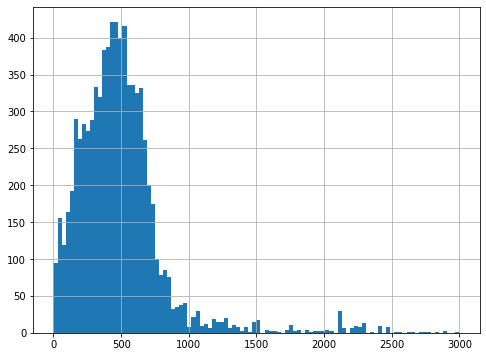

In [86]:
# Построим гистограмму с расстоянием от местоположения квартир до ближайшего парка
apartment_data_filtered['parks_nearest'].hist(bins=100, range=(0, 3000), figsize=(8, 6));

На гистограмме хорошо заметен пик значений в районе 0 м, что связано с заменой пропущенных значений на число 0 и отсутствием парков в пределах 3 тыс. метров от расположения квартир. При этом также заметен рост значений в районе 500 м и присутствуют отдельные значения в диапазоне от 1 до 2,5 тыс. м.

**В данном случае аномальные значения отсутствуют, так как замена пропущенных значений была осуществлена в рамках данного исследования. Замена данных или их удаление не требуется.**

**Таким образом мы провели исследование и описали 10 параметров, для части из которых мы осуществили замену или удаление аномальных значений в целях очистки данных.**

Проверим, насколько сильно изменилось количество данных после предобработки и изменения или удаления аномальных значений. Для этого сравним размер изначального датафрейма, записанного в переменную `apartment_data_shape` и датафрейма с отфильтрованными данными, размер которого мы запишем в переменную `apartment_data_filtered_shape`.

In [87]:
# Выводим информацию об исходном количестве данных
print('Размер исходного датафрейма:', apartment_data_shape)
print('Количество строк:', apartment_data_shape[0])
print('Количество столбцов:', apartment_data_shape[1])

print()

# Записываем информацию об отфильтрованном количестве данных при помощи метода shape()
apartment_data_filtered_shape = apartment_data_filtered.shape
print('Размер отфильтрованного датафрейма:', apartment_data_filtered_shape)
print('Количество строк:', apartment_data_filtered_shape[0])
print('Количество столбцов:', apartment_data_filtered_shape[1])

Размер исходного датафрейма: (23699, 22)
Количество строк: 23699
Количество столбцов: 22

Размер отфильтрованного датафрейма: (23562, 29)
Количество строк: 23562
Количество столбцов: 29


В соответствии с представленным выводом данных можно отметить, что количество столбцов в отфильтрованном датафрейме увеличилось - с 22 до 29, так как мы добавили новые столбцы (7 столбцов). При этом количество строк незначительно уменьшилось - с 23 699 до 23 562. Сравним количество строк отфильтрованного и исходного датафреймов.

In [88]:
apartment_data_filtered_shape[0]/apartment_data_shape[0]

0.9942191653656273

**В соответствии с проведенным расчетом, после предобработки и изменения или удаления аномальных значений в новом датафрейме осталось более 99% исходных данных, что говорит о том, что дальнейший анализ будет являться актуальным.**

#### Изучение скорости продажи квартир

Проведем анализ столбца `days_exposition`, где указано число дней в течение которых было размещено объявление (от публикации до снятия), в целях определения скорости продажи квартир. Для этого проверим распределение значений при помощи метода `value_counts`, построим гистограмму и рассчитаем среднее и медиану.

45      878
60      538
7       234
30      208
90      200
       ... 
1572      1
1396      1
1268      1
1252      1
1391      1
Name: days_exposition, Length: 1139, dtype: Int64

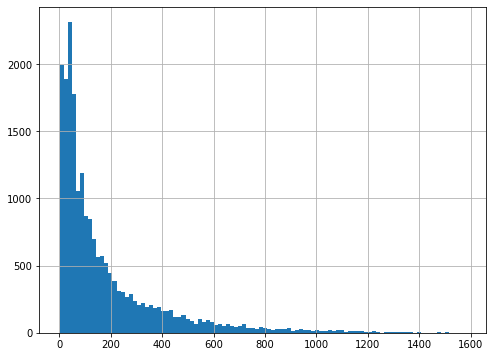

In [89]:
# Проверим распределение количества объявлений в зависимости от числа дней в течение которых было размещено объявление
# (от публикации до снятия)
display(apartment_data_filtered['days_exposition'].value_counts())

# Построим гистограмму 
apartment_data_filtered['days_exposition'].hist(bins=100, figsize=(8, 6));

In [90]:
# Рассчитаем среднее и медиану
print('Среднее значение составляет:', apartment_data_filtered['days_exposition'].mean().round(0), 'день')
print('Медианное значение составляет:', apartment_data_filtered['days_exposition'].median(), 'дней')

Среднее значение составляет: 181.0 день
Медианное значение составляет: 95.0 дней


**Необходимо отметить, что большое количество значений в районе 0 дней обусловлено проведенной нами заменой пропущенных значений на число 0.**

В соответствии с полученным распределением значений и построенной гистограммой можно сделать вывод о том, что наибольшее количество объявлений о продаже квартир, снятых с публикации, приходится на объявления, которые были размещены в течение 45 дней.

Основная часть квартир продавалась в течение 45-90 дней при медианном значении 95 дней.

Среднее значение в данном случае является завышенным - оно больше медианы почти в 2 раза, что может быть обусловлено большой длительностью размещения отдельных объявлений, в частности размещенных более 1000 дней. Таким образом, объявления, размещенные более 200 дней можно отнести к крайне долгим продажам.

Быстрыми продажами можно считать объявления, которые были размещены в течение 7-45 дней.

#### Определение основных факторов, оказывающих влияние на общую (полную) стоимость квартир

Определим факторы, которые больше всего влияют на общую (полную) стоимость квартир посредством построения диграмм рассеивания для каждого из них.

##### Параметр "Общая площадь"

Проверим, влияет ли общая площадь квартиры на ее стоимость.

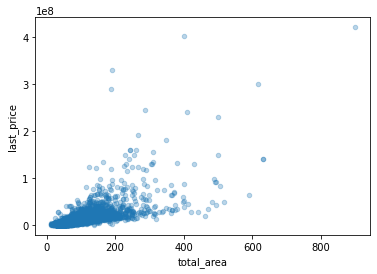

In [91]:
apartment_data_filtered.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

**В соответствии с данными, представленными на диаграмме, можно сделать вывод о том, что явная зависимость между площадью квартиры и ее стоимостью зафиксирована для квартир с общей площадью менее 300 кв. м и стоимостью менее 5 млн., тогда как квартиры с большими значениями по данным параметрам не соответствуют данным наблюдениям, что обусловлено влиянием других параметров на стоимость квартиры в таких случаях.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [92]:
apartment_data_filtered['total_area'].corr(apartment_data_filtered['last_price'])

0.7026123478947807

**Корреляция в 0.7 говорит о наличии относительно сильной связи между площадью квартиры и ее стоимостью, при этом в ряде случаев  рост стоимости квартиры связан не только с ее площадью, но также и другими параметрами.**

##### Параметр "Жилая площадь"

Проверим, влияет ли жилая площадь квартиры на ее стоимость.

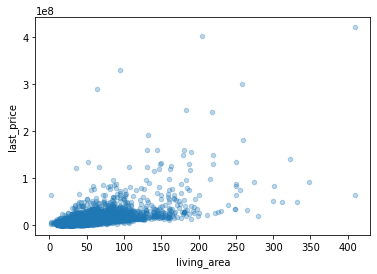

In [93]:
apartment_data_filtered.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);

**Представленная диаграмма свидетельствует о том, что явная зависимость между жилой площадью квартиры и ее стоимостью зафиксирована для квартир с жилой площадью менее 200 кв. м и стоимостью менее 5 млн., тогда как квартиры с большими значениями по данным параметрам не соответствуют данным наблюдениям, что обусловлено влиянием других параметров на стоимость квартиры в таких случаях.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [94]:
apartment_data_filtered['living_area'].corr(apartment_data_filtered['last_price'])

0.6081977522973685

**Корреляция в 0.61 говорит о наличии связи между площадью квартиры и ее стоимостью, однако в данном случае она несколько ниже, чем для параметра `общая площадь квартиры`, что свидетельствует о немного более сильном влиянии других параметров на стоимость.**

##### Параметр "Площадь кухни"

Проверим, влияет ли площадь кухни в квартире на ее стоимость.

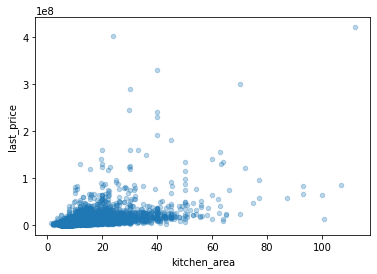

In [95]:
apartment_data_filtered.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);

**Диаграмма отражает наличие зависимости между площадью кухни в квартире и ее стоимостью для квартир с площадью кухни менее 50 кв. м и стоимостью менее 5 млн., тогда как квартиры с большими значениями по данным параметрам не соответствуют данным наблюдениям, что обусловлено определенным влиянием других параметров на стоимость квартиры в таких случаях.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [96]:
apartment_data_filtered['kitchen_area'].corr(apartment_data_filtered['last_price'])

0.5206700679677433

**Корреляция в 0.52 говорит о наличии связи между площадью кухни в квартире и ее стоимостью, но в рассматриваемом случае она является не очень сильной, что обусловлено определенным влиянием других параметров на стоимость.**

##### Параметр "Количество комнат"

Проверим, влияет ли количество комнат в квартире на ее стоимость.

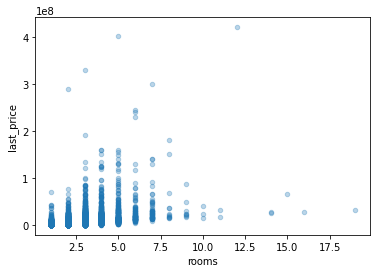

In [97]:
apartment_data_filtered.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);

В данном случае распределение значений, представленных на диаграмме, больше похоже на гистограмму, так как они распределены по группам квартир с определенным количеством комнат. **В соответствии с представленными данными наблюдается определенная зависимость для квартир с количеством комнат менее 5 и стоимостью менее 15 млн, однако зафиксированы случаи, в которых в квартирах со стоимостью более 15 млн есть только 2-5 комнат, тогда как в квартирах со стоимостью около 2-3 млн есть 13 и более комнат.**

Рассчитаем коэффициент корреляции Пирсона для проверки линейной связи между данными параметрами.

In [98]:
apartment_data_filtered['rooms'].corr(apartment_data_filtered['last_price'])

0.39411222907359644

**Корреляция составляет 0.39, что говорит о небольшой связи между количеством комнат в квартире и ее стоимостью. В связи с этим можно сделать вывод, что количество комнат оказывает небольшое влияние на стоимость квартиры.**

##### Параметр "Тип этажа, на котором расположена квартира"

Проверим, влияет ли тип этажа, на котором расположена квартира на ее стоимость.

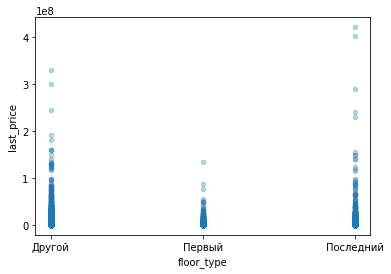

In [99]:
apartment_data_filtered.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.3);

В связи с тем, что данный параметр содержит в себе категориальные значения, диаграмма рассеяния больше похожа на гистограмму. Даже если была бы произведена замена указанных категорий на числовые значения, например на 0, 1 и 2, отображение значений было бы таким же, и похожим аналогичным отображению значений по параметру `количество комнат`.

**Непосредственно говоря о данных представленных на диаграмме можно сделать вывод о том, что наблюдается некоторая зависимость для квартир с типом этажей `другой` и `последний` и стоимостью квартир менее 10 млн, однако влияние данного параметра на стоимость вряд-ли можно назвать значимой.**

В данном случае коэффициент корреляции Пирсона не рассчитывается, поскольку в столбце `floor_type` представлены категориальные значения.

##### Параметр "Дата размещения"

Проверим, влияет ли дата размещения квартиры на ее стоимость в зависимости от дня недели, месяца и года.

###### Дни недели

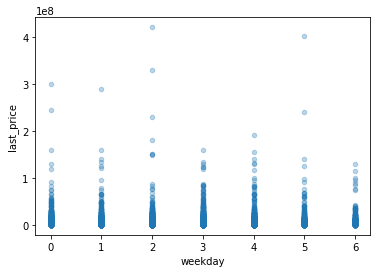

In [100]:
apartment_data_filtered.plot(x='weekday', y='last_price', kind='scatter', alpha=0.3);

Аналогично параметрам `количество комнат` и `тип этажа`, построенная диаграмма больше напоминает гистограмму, так как значения распределены между группами объявлений о продаже квартир, размещенными в разные дни недели.

**Представленные на диаграмме данные не позволяют однозначно говорить о наличии какой-либо зависимости между днем недели, в который было размещено объявление о продаже квартиры, и стоимостью квартиры, так как распределение значений примерно одинаково для всех дней недели.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [101]:
apartment_data_filtered['weekday'].corr(apartment_data_filtered['last_price'])

-0.0029953825657754274

**Отрицательная корреляция в -0.003 говорит об отсутствии какой-либо связи между днем недели, в который было размещено объявление о продаже квартиры, и ее стоимостью.**

###### Месяцы

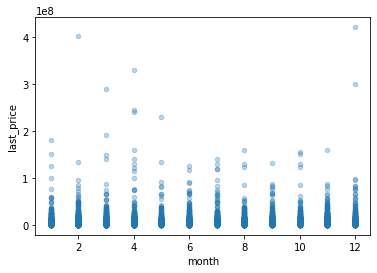

In [102]:
apartment_data_filtered.plot(x='month', y='last_price', kind='scatter', alpha=0.3);

Также как и в случае с параметром `дни недели`, построенная диаграмма больше напоминает гистограмму, так как значения распределены между группами объявлений о продаже квартир, размещенными в разные месяцы.

**Представленные на диаграмме данные не позволяют однозначно говорить о наличии какой-либо зависимости между месяцем, в котором было размещено объявление о продаже квартиры, и стоимостью квартиры, так как распределение значений примерно одинаково для всех месяцев.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [103]:
apartment_data_filtered['month'].corr(apartment_data_filtered['last_price'])

0.0005571981903969438

**Корреляция в 0.0006 говорит об отсутствии какой-либо связи между месяцем, в котором было размещено объявление о продаже квартиры, и ее стоимостью.**

###### Годы

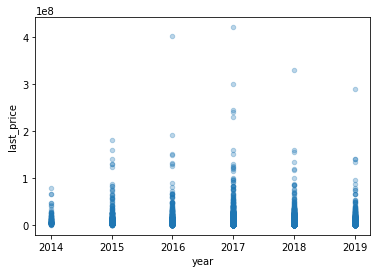

In [104]:
apartment_data_filtered.plot(x='year', y='last_price', kind='scatter', alpha=0.3);

Также как и в случае с параметрами `дни недели` и `месяцы`, построенная диаграмма больше напоминает гистограмму, так как значения распределены между группами объявлений о продаже квартир, размещенными в разные годы.

**Представленные на диаграмме данные свидетельствуют о наличии следующей зависимости между годом публикации объявления и стоимостью квартиры - с годами стоимость квартир постепенно растет, что в частности может быть обусловлено инфляцией и увеличением затрат строительных компаний на строительство новых жилых домов.**

Рассчитаем коэффициент корреляции Пирсона для определения наличия линейной связи между данными параметрами.

In [105]:
apartment_data_filtered['year'].corr(apartment_data_filtered['last_price'])

-0.04676808741580803

**Отрицательная корреляция в -0.047 говорит о наличии обратной зависимости между годом публикации объявления о продаже квартиры и ее стоимостью, так как с течением времени стоимость росла.**

**Таким образом, из всех проанализированных параметров, наибольшее влияние на стоимость квартиры оказывают ее общая площадь, жилая площадь и площадь кухни.**

#### Расчет средней цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

Рассчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений при помощи сводной таблицы. Для этого в первую очередь найдем 10 населенных пунктов с наибольшим числом объявлений.

In [106]:
# Ищем 10 населенных пунктов с наибольшим количеством объявлений и записываем их в переменную top_ten_cities_ads
top_ten_cities_ads = apartment_data_filtered.value_counts('locality_name_new', ascending=False).head(10)

top_ten_cities_ads

locality_name_new
Санкт-Петербург      15649
Мурино                 586
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

В соответствии с представленными данными, наибольшее количество объявлений о продаже квартир зафиксировано в Санкт-Петербурге, о чем уже было упомянуто ранее. Построим сводную таблицу для данных населенных пунктов.

In [107]:
# Создаздим сводную таблицу и запишем ее в новую переменную square_meter_pivot для последующего упрощения работы с данными
# о средней цене квадратного метра по населенным пунктам.
# При этом сделаем срез по индексам - названиям городов из переменной top_ten_cities_ads
square_meter_pivot = (
    apartment_data_filtered
    .query('locality_name_new in (@top_ten_cities_ads.index)')
    .pivot_table(index='locality_name_new', values='square_meter_price')
    .sort_values('square_meter_price', ascending=False)
)
square_meter_pivot

,square_meter_price
locality_name_new,
Санкт-Петербург,114755.310195
Пушкин,103125.819377
деревня Кудрово,92473.547559
поселок Парголово,90175.913089
Мурино,86041.116024
поселок Шушары,78551.344647
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


В соответствии с построенной сводной таблицей можно сделать вывод о том, что наибольшая стоимость одного квадратного метра жилья зафиксирована в Санкт-Петербурге, что является ожидаемым, так как он является вторым по численности городом в Российской Федерации и так называемой "культурной столицей", в связи с чем многие заинтересованы в приобретении жилья в данном городе.

Также высокая стоимость одного квадратного метра жилья зафиксирована в городе Пушкин, который является крайне популярным ввиду большого количества парков и относительно близкого расположения к Санкт-Петербургу.

Наименьшая стоимость квадратного метра зафиксирована в городах Гатчина, Всеволожск и Выборг, что с высокой вероятностью обусловлено большим расстоянием до Санкт-Петербурга, а также относительно небольшой численностью населения, проживающего в данных городах.

####  Расчет средней стоимости квартир, расположенных на разном удалении от центра города в Санкт-Петербурге

Рассчитаем среднюю стоимость квартир, расположенных на разном удалении от центра города в Санкт-Петербурге. Для этого сделаем срез данных по Санкт-Петербургу, применим сводную таблицу и построим диаграмму для наглядного отображения данных.

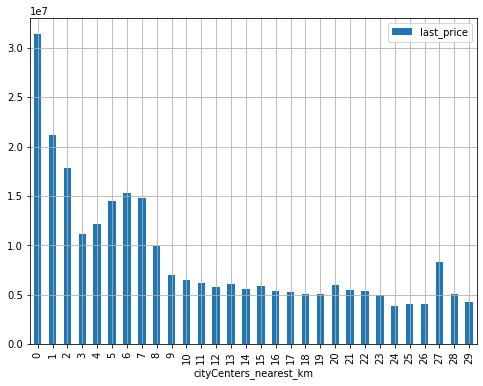

In [108]:
# Создадим переменную для новой сводной таблицы
mean_price_and_distance_spb = (
    apartment_data_filtered
    .query('locality_name_new == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
)
# Строим гистограмму с распределением средней стоимости квартир в Санкт-Петербурге в зависимости от расстояния от центра
mean_price_and_distance_spb.plot(kind='bar', figsize=(8, 6), grid=True);

В соответствии с построенной диаграммой можно сделать вывод о том, что стоимость квартир напрямую зависит от расстояния от центра Санкт-Петербурга - чем ближе к центру, тем стоимость квартиры становится выше. При этом заметны проседания в стоимости на 3 и 4 километрах, что может быть связано с не самым удобным расположением квартир в некоторых районах на указанном расстоянии.

С 9 по 26 км происходит постепенное снижение стоимости квартир за исключением редких небольших увеличений стоимости, что может быть связано с более удобной инфраструктурой в определенных местах.

На 27 км заметен резкий рост стоимости, что с высокой вероятностью обусловлено наличием нового строящегося жилья или улучшением условий жизни в определенных районах, в связи с чем стоимость жилья растет.

### Выводы

В рамках данного исследования был проведен анализ объявлений о продаже квартир в Санкт-Петербурге и близлежащих к нему населенных пунктов.

В 1 разделе мы ознакомились с исходными данными и провели их первичный анализ, на основании которого выявили наличие значительного количества строк с пропущенными значениями в столбцах и описали возможные причины их появления из них для каждого из столбцов.

Во 2 разделе мы осуществили замену пропущенных значений, изменили типы данных в столбцах на соответствующие представленным в ним значениям и осуществили замену явных и неявных дубликатов в столбце `locality_name`.

В 3 разделе мы добавили новые столбцы, необходимые для последующего анализа данных, в т.ч.:
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

В подразделе 4.1 мы проводили анализ следующего перечня параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

В соответствии с проведенным анализом было выявлено, что наибольшие значения общей площади квартир, их жилой площади, площади кухонь, количества комнат и стоимости зафиксированы для города Санкт-Петербург, так как он является одним из крупнейших городов России с хорошо сохранившейся исторической застройкой центра города.

По ряду указанных показателей были зафиксированы аномальные значения (выбросы), которые были заменены на корректные значения или удалены при отсутствии логичной замены.

В подразделе 4.2 мы изучили как быстро продавались квартиры и выявили следующее:
- наибольшее количество объявлений о продаже квартир, снятых с публикации, приходится на объявления, которые были размещены в течение 45 дней;
- основная часть квартир продавалась в течение 45-90 дней при медианном значении 95 дней;
- среднее значение в данном случае является завышенным - оно больше медианы почти в 2 раза, что может быть обусловлено большой длительностью размещения отдельных объявлений, в частности размещенных более 1000 дней. Таким образом, объявления, размещенные более 200 дней можно отнести к крайне долгим продажам;
- быстрыми продажами можно считать объявления, которые были размещены в течение 7-45 дней.

В рамках подраздела 4.3 были определены факторы, которые больше всего влияют на общую (полную) стоимость объекта, а именно:
- общая площадь квартиры - корреляция между данным параметром и стоимостью квартиры составила 0,7;
- жилая площадь квартиры - корреляция между данным параметром и стоимостью квартиры составила 0,61;
- площадь кухни квартиры - корреляция между данным параметром и стоимостью квартиры составила 0,52.

В подразделе 4.4 был произведен расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений на основании которого были сформированы следующего выводы:
- наибольшая стоимость одного квадратного метра жилья зафиксирована в Санкт-Петербурге, что является ожидаемым, так как он является вторым по численности городом в Российской Федерации и так называемой "культурной столицей", в связи с чем многие заинтересованы в приобретении жилья в данном городе;
- также высокая стоимость одного квадратного метра жилья зафиксирована в городе Пушкин, который является крайне популярным ввиду большого количества парков и относительно близкого расположения к Санкт-Петербургу;
- наименьшая стоимость квадратного метра зафиксирована в городах Гатчина, Всеволожск и Выборг, что с высокой вероятностью обусловлено большим расстоянием до Санкт-Петербурга, а также относительно небольшой численностью населения, проживающего в данных городах.

В подразделе 4.5 были выделены квартиры в Санкт-Петербурге и рассчитана их средняя стоимость на разном удалении от центра, а также сформированы следующие выводы:
- стоимость квартир напрямую зависит от расстояния от центра Санкт-Петербурга - чем ближе к центру, тем стоимость квартиры становится выше. При этом заметны проседания в стоимости на 3 и 4 километрах, что может быть связано с не самым удобным расположением квартир в некоторых районах на указанном расстоянии;
- с 9 по 26 км происходит постепенное снижение стоимости квартир за исключением редких небольших увеличений стоимости, что может быть связано с более удобной инфраструктурой в определенных местах;
- на 27 км заметен резкий рост стоимости, что с высокой вероятностью обусловлено наличием нового строящегося жилья или улучшением условий жизни в определенных районах, в связи с чем стоимость жилья растет.

Таким образом, было проведено комплексное исследование объявлений о продаже квартир в Санкт-Петербурге и близлежащих к нему населенных пунктов, на основании которого можно сделать вывод о том, что пользователи при заполнении данных в объявлениях о продаже квартир в некоторых случаях могут указывать данные, не соответствующие реальности, в том числе слишком высокую или низкую высотку потолков, а также не указывать никакие данные в целом, что в обоих случаях усложняет получение достоверных данных. Кроме того, получение данных из геосервисов по некоторым населенным пунктам является невозможным ввиду их отсутствия в базах данных указанных геосервисов или возникновения ошибок при формирования выгрузок. В связи с этим в обоих случаях требуется осуществление контроля за формированием и использованием указанных данных в рамках исследований.